## Web Crawling, Web Scraping
- Web Crawling: 웹사이트에 접근하여 웹 페이지를 가져오는 것
- Web Scraping: 가져온 웹 페이지에서 필요한 정보만 추출해내는 것
- 파이썬 코드로 하나, numpy나 pandas는 데이터가 있을 때 그 데이터를 1차 가공해서 인공지능 앱을 만들 때 필요한 데이터를 준비하는 과정이어서 데이터를 처리/정제/결측치 넣기 등의 작업이었다면, Web Crawling이나 Web Scraping은 데이터를 주로 웹에서 수집하는 방법임

In [1]:
# 웹 페이지는 웹 서버에 저장되어 있음
# 웹 클라이언트가 요청해야만 웹 페이지를 받아볼 수 있다(웹 서버 접근을 위해 웹 클라이언트가 필요)
# 웹 클라이언트(웹 브라우저)
# 통신 프로토콜: http  (데이터를 주고 받고 할 때 웹 서버와 웹 클라이언트의 통신 약속)
# 웹 클라이언트 : Python 모듈(urllib.request, requests) 이용 [모듈에 http 기능이 들어있음] => 정적 웹 페이지 다루기
# 웹 브라우저를 조종하는 Selenium (웹 브라우저를 이용해 사이트 접속해 데이터를 중간에 가로채 제어함) => 동적 웹 페이지 다루기

# BeautifulSoup : 웹 페이지(html) 문서에서 필요한 정보만 추출 [Web Scraping]

In [20]:
# 먼저, 모듈 urllib.request 이용해보기

# urlopen으로 웹 사이트 연결-첫번째 페이지 가져옴- 요청 데이터를 보내면 응답이 오므로 response의 약자인 res로 받음
import urllib.request     
res = urllib.request.urlopen('http://www.naver.com')

type(res)   # http.client.HTTPResponse  ('응답 객체'가 반환됨 => 네이버가 응답으로 준 것)
# dir(res)
res.status  # 200  => 응답이 정상이면 헤더의 상태정보는 200이 나옴(status가 상태 정보를 알려줌/ 500: 서버 오류, 400:주소 오류)
headers = res.getheaders() # http 헤더를 의미. 메타데이터는 이용자에게는 보여줄 필요없으나 프로그램적인 면에서 봐야 할 때 씀
type(headers) # list             (http 데이터는 헤더 데이터-태그 등이 포함-와 바디데이터-이용자가 보는 브라우저 화면-로 나뉨)


# http헤더 정보에서 문자 인코딩만 추출하기
# headers는 리스트이므로 첨자 이용/ headers에서 두 번째 인덱스행에 있고 headers[2] 여기까지는 튜플임
# headers[2]를 출력하면 ('Content-Type', 'text/html; charset=UTF-8')가 반환됨
# headers[2][1]를 출력하면 'text/html; charset=UTF-8'가 반환됨.  (2행의 두 번째 정보 => [2][1])
headers[2][1].split('=')[1].strip()  # 'UTF-8'    => 등호로 쪼개면 [0]과 [1]이 나오는데, 그 중 오른쪽 것[1]을 가져옴

'UTF-8'

In [3]:
headers = res.getheaders()
headers[2]     # 인코딩 행만 가져오는 경우 => headers는 리스트이나 결과가 튜플임 

('Content-Type', 'text/html; charset=UTF-8')

In [4]:
# 문제) 위에서 가져온 헤더 정보를 한 행씩 읽어서 화면에 표시(항목번호를 붙여서 보여줄 것, 번호는 1부터 시작할 것)
# 내가 푼 것

for i, v in enumerate(headers, start=1):
    print(i, v)

1 ('Server', 'NWS')
2 ('Date', 'Sun, 20 Aug 2023 08:04:49 GMT')
3 ('Content-Type', 'text/html; charset=UTF-8')
4 ('Transfer-Encoding', 'chunked')
5 ('Connection', 'close')
6 ('Set-Cookie', 'PM_CK_loc=556843d0b85a557782269faae2b6a37664de35e22bd47c944e659b566511fa9e; Expires=Mon, 21 Aug 2023 08:04:49 GMT; Path=/; HttpOnly')
7 ('Cache-Control', 'no-cache, no-store, must-revalidate')
8 ('Pragma', 'no-cache')
9 ('P3P', 'CP="CAO DSP CURa ADMa TAIa PSAa OUR LAW STP PHY ONL UNI PUR FIN COM NAV INT DEM STA PRE"')
10 ('X-Frame-Options', 'DENY')
11 ('X-XSS-Protection', '1; mode=block')
12 ('Strict-Transport-Security', 'max-age=63072000; includeSubdomains')
13 ('Referrer-Policy', 'unsafe-url')


In [5]:
# 문제) 위에서 가져온 헤더 정보를 한 행씩 읽어서 화면에 표시(항목번호를 붙여서 보여줄 것, 번호는 1부터 시작할 것)
# 강사님 버전

for i, line in enumerate(headers, start=1):
    print('%s. %s : %s' %(i,line[0],line[1]))

1. Server : NWS
2. Date : Sun, 20 Aug 2023 08:04:49 GMT
3. Content-Type : text/html; charset=UTF-8
4. Transfer-Encoding : chunked
5. Connection : close
6. Set-Cookie : PM_CK_loc=556843d0b85a557782269faae2b6a37664de35e22bd47c944e659b566511fa9e; Expires=Mon, 21 Aug 2023 08:04:49 GMT; Path=/; HttpOnly
7. Cache-Control : no-cache, no-store, must-revalidate
8. Pragma : no-cache
9. P3P : CP="CAO DSP CURa ADMa TAIa PSAa OUR LAW STP PHY ONL UNI PUR FIN COM NAV INT DEM STA PRE"
10. X-Frame-Options : DENY
11. X-XSS-Protection : 1; mode=block
12. Strict-Transport-Security : max-age=63072000; includeSubdomains
13. Referrer-Policy : unsafe-url


In [6]:
res.info() # <http.client.HTTPMessage at 0x1963d844f10> => 응답데이터가 res에 들어있고 info()가 반환하는 것은 http 메세지객체임

In [7]:
dir(res.info())

['__bytes__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_charset',
 '_default_type',
 '_get_params_preserve',
 '_headers',
 '_payload',
 '_unixfrom',
 'add_header',
 'as_bytes',
 'as_string',
 'attach',
 'defects',
 'del_param',
 'epilogue',
 'get',
 'get_all',
 'get_boundary',
 'get_charset',
 'get_charsets',
 'get_content_charset',
 'get_content_disposition',
 'get_content_maintype',
 'get_content_subtype',
 'get_content_type',
 'get_default_type',
 'get_filename',
 'get_param',
 'get_params',
 'get_payload',
 'get_unixfrom',
 'getallmatchingheaders',
 'i

In [8]:
encoding = res.info().get_content_charset()  # 'utf-8' 이 반환됨 
# res.info()객체니까 이후에 점 찍기 가능. dir로 확인해본 속성 중 get_content_charset() 메소드를 써 봄

encoding = 'utf-8' if encoding is None else encoding  # ['utf-8' if encoding is None else encoding] => 파이썬의 삼항 연산자임 
encoding

'utf-8'

In [9]:
# res.read()  # 응답 객체를 읽어오라는 의미이니 그 안의 문자열을 가져오라는 뜻
# 다 읽어오면 다시 read()호출시 가져올 데이터가 없어서 값이 안 나와 주석처리함

# html로 리턴값이 확인되나 한글 부분이 16진수로 표시됨(한글이 16진수로 인코딩되어 있음)
 
# "name":"\xec\xa4\x91\xec\x95\x99SUNDAY"  => 역슬러시 ec 등 16진수 확인됨. 디코딩 필요
# urllib.request는 데이터를 가져오기 위한 모듈이라 화면 출력용은 아니어서 한글로 보려면 출력용으로 디코딩[인코딩 반대]해줘야 함


# text = res.read(1000).decoding('utf-8')  # decoding으로 하면 오류남 
text = res.read(1000).decode('utf-8')
text

'   <!doctype html> <html lang="ko" class="fzoom"> <head> <meta charset="utf-8"> <meta name="Referrer" content="origin"> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <title>NAVER</title> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s'

In [ ]:
# 문제) daum.net에 접속해서 응답데이터 html을 가져와서 인코딩한 1000개 문자를 디코딩하여 화면에 표시

In [10]:
# 내가 푼 것
import urllib.request
res = urllib.request.urlopen('http://www.daum.net')
type(res)   # http.client.HTTPResponse
# dir(res)
res.status  # 200
headers = res.getheaders()
headers   # UTF-8이 없음

[('Date', 'Sun, 20 Aug 2023 08:05:11 GMT'),
 ('Content-Type', 'text/html'),
 ('Content-Length', '763427'),
 ('Connection', 'close'),
 ('Vary', 'Accept-Encoding'),
 ('Vary', 'Origin'),
 ('Vary', 'Access-Control-Request-Method'),
 ('Vary', 'Access-Control-Request-Headers'),
 ('Access-Control-Allow-Origin', '*'),
 ('Accept-Ranges', 'bytes'),
 ('X-WCSS', 'dC1jb21tb24wMS1id2NhY2hlMjA6aGl0OjA='),
 ('Report-To',
  '{"group":"kakao-nel","max_age":86400,"endpoints":[{"url":"https://nel.onkakao.net/upload/"}],"include_subdomains":true}'),
 ('NEL',
  '{"report_to":"kakao-nel","max_age":86400,"include_subdomains":true}'),
 ('Cache-Control', 'no-cache, no-store'),
 ('Pragma', 'no-cache'),
 ('Strict-Transport-Security', 'max-age=15724800')]

In [11]:
type(headers)

list

In [12]:
encoding = res.info().get_content_charset()  # 'utf-8'
encoding = 'utf-8' if encoding is None else encoding  # => 파이썬의 삼항 연산자 
encoding

'utf-8'

In [13]:
text = res.read(1000).decode('utf-8')
text

'<!doctype html>\n<html lang="ko">\n <head>\n  <meta charset="utf-8">\n  <title>Daum</title>\n  <meta http-equiv="x-ua-compatible" content="IE=edge">\n  <meta property="og:url" content="https://www.daum.net/">\n  <meta property="og:type" content="website">\n  <meta property="og:title" content="Daum">\n  <meta http-equiv="Pragma" content="no-cache">\n  <meta http-equiv="Expires" content="-1">\n  <meta name="referrer" content="origin">\n  <meta property="og:image" content="https://i1.daumcdn.net/svc/image/U03/common_icon/5587C4E4012FCD0001">\n  <meta property="og:description" content="이용자 선택권을 강화한 뉴스, 세상의 모든 정보를 연결하는 검색. Daum에서 나의 관심 콘텐츠를 즐겨보세요.">\n  <meta name="description" content="이용자 선택권을 강화한 뉴스, 세상의 모든 정보를 연결하는 검색. Daum에서 나의 관심 콘텐츠를 즐겨보세요.">\n  <meta name="msapplication-task" content="name=Daum;action-uri=//www.daum.net/;icon-uri=/favico'

In [14]:
# 문제) daum.net에 접속해서 응답데이터 html을 가져와서 인코딩한 1000개 문자를 디코딩하여 화면에 표시
# 강사님이 푼 것
# 파이썬 모듈이 웹 브라우저 역할을 함(http 프로토콜만 있으면 되므로)

import urllib.request
res = urllib.request.urlopen('http://www.daum.net')
encoding = res.info().get_content_charset() 
encoding = 'utf-8' if encoding is None else encoding 
res.read(1000).decode(encoding)

'<!doctype html>\n<html lang="ko">\n <head>\n  <meta charset="utf-8">\n  <title>Daum</title>\n  <meta http-equiv="x-ua-compatible" content="IE=edge">\n  <meta property="og:url" content="https://www.daum.net/">\n  <meta property="og:type" content="website">\n  <meta property="og:title" content="Daum">\n  <meta http-equiv="Pragma" content="no-cache">\n  <meta http-equiv="Expires" content="-1">\n  <meta name="referrer" content="origin">\n  <meta property="og:image" content="https://i1.daumcdn.net/svc/image/U03/common_icon/5587C4E4012FCD0001">\n  <meta property="og:description" content="이용자 선택권을 강화한 뉴스, 세상의 모든 정보를 연결하는 검색. Daum에서 나의 관심 콘텐츠를 즐겨보세요.">\n  <meta name="description" content="이용자 선택권을 강화한 뉴스, 세상의 모든 정보를 연결하는 검색. Daum에서 나의 관심 콘텐츠를 즐겨보세요.">\n  <meta name="msapplication-task" content="name=Daum;action-uri=//www.daum.net/;icon-uri=/favico'

## Query String

- url에 쿼리문 만들기
- http://abc.com?page=5&id=10

In [15]:
# 파이썬 모듈에서 쿼리 스트링 다루기   =>  'get 방식'

import urllib    # 주소에 접근 가능한 라이브러리를 import
urllib.parse.urlencode({'page':5, 'id':10})  # 'page=5&id=10'가 반환됨. parse => 일반 문자로 쿼리 스트링을 만들어낸다는 의미.
urllib.parse.urlencode({'address':'관악구 신림동'})  # 'address=%EA%B4%80%EC%95%85%EA%B5%AC+%EC%8B%A0%EB%A6%BC%EB%8F%99' 16진수

# 한글은 원래 url에 쿼리 스트링을 줄 수 없어서 특수문자/한글/공백등은  url 문자(16진수)로 인코딩 과정을 거쳐야 함 

'address=%EA%B4%80%EC%95%85%EA%B5%AC+%EC%8B%A0%EB%A6%BC%EB%8F%99'

In [16]:
from urllib import request, parse    # urllib.request 을 짧게 쓰고자 import 방법 바꿈

param = parse.urlencode({'id':'smith'})   # urllib.parse 가 아닌  parse로 쓸 수 있게 됨.
param   # 'id=smith' 리턴됨.  (쿼리 스트링 만든 것)
url = 'http://localhost/crawling/test?{}'.format(param) # %s 보단 {}가 서식이 더 잘 보이므로 식별을 위해 이 서식 문자열 선택
url                                                     # 물음표 뒤에 param 값을 붙인다는 뜻

'http://localhost/crawling/test?id=smith'

In [18]:
# 웹사이트 응답이 표시되는 것 확인하기
res = request.urlopen(url)   # 이클립스에 컨트롤러 생성 후 실행함  <http.client.HTTPResponse at 0x13ad985ff40>
res

In [19]:
# 서버에서 'id':'smith'가 웹사이트 응답으로 표시되는 것 확인하기
# url = 'http://localhost/crawling/test?{}'.format(param)
# 요청을 받을 만한 로컬 서버가 준비되었으므로 요청을 했을 때 파라미터가 붙게 될 것이고 이게 서버로 전달되면 
# 스프링에 만들어둔 컨트롤러가 실행되면서 그 데이터가 이 주피터 노트북 셀에 결과값으로 확인됨
# 요청이니까  request를 붙여서 실행하고 응답 res로 받음

res = request.urlopen(url)   # 이클립스에 컨트롤러 생성 후 실행함 [컨트롤러에서 제이슨 문자열로 보내는 방식 map 이용함] 
res.read(1000).decode('utf-8')


# 즉, 웹 브라우저가 없어도 만들어둔 이 프로그램을 이용해서도 웹 서버 접근이 가능하다는 것을 알 수 있고 
# url도 만들 수 있고
# 웹 사이트 가서 데이터를 가져올 수 있다는 것을 알 수 있음

'{"서버수신":"성공","id":"smith"}'

In [ ]:
# 위의 내용 응용 문제)
# {'name':'홍길동', 'address':'관악구 신림동'}
# 위의 파라미터를 포함하여 서버에 요청했을 때 서버에서
# 2개의 파라미터를 파이썬 클라이언트가 제대로 수신했는지 응답하여 확인해보세요

In [20]:
# 강사님 버전- 컨트롤러 추가로 만든 후 진행
# 웹 주소를 파이썬 모듈에 주면 파이썬이 웹 브라우저 역할을 해주고 있음
# 웹 서핑을 수동으로 하지 않고 자동으로 이 프로그램에서 진행하게끔 하려고 진행

param = parse.urlencode({'name':'홍길동','address':'관악구 신림동'})
url = 'http://localhost/crawling/addr?{}'.format(param)
res = request.urlopen(url)  
res.read(1000).decode('utf-8')

'{"address":"관악구 신림동","name":"홍길동"}'

### urllib.request.Request 활용 POST 방식 요청
- req = request.Request(url='url', data=data) => request 모듈을 이용해 Request 생성자를 돌려주면 Request 객체가 만들어지는데 Request(url='url', data=data)라는 이 요청 객체 자체가 post 방식을 진행하는 객체임. url과 data를 달아줌
- request.urlopen(req)

In [21]:
from urllib import request, parse     # '포스트 방식'이라 이클립스만 저장 후 실행하고 셀 실행하면 데이터 값 나옴
# 서버가 존재하니 클라이언트가 있는 것이므로 먼저 컨트롤러 메소드 만들어야 함

encoded = parse.urlencode({'name':'King','dept':27}) # url 데이터로 인코딩 한 후
postdata = encoded.encode('ascii')   # 아스키데이터로 인코딩을 또 해야 함 => 포스트 방식일 땐 필요
req = request.Request(url='http://localhost/crawling/add', data=postdata) 
res = request.urlopen(req)
print(res.status)   # 200  상태로 정상 수신되는지 확인함
res.read().decode('utf-8')  # '{"name":"King","dept":"27"}' 리턴 됨 => 브라우저-> 서버 -> 브라우저 한 사이클 돈 것 인증된 것

200


'{"name":"King","dept":"27"}'

## requests 모듈 활용
- GET, HEAD, POST

In [9]:
# requests 활용 / 모듈 requests 이용해보기
import requests

In [23]:
res = requests.request('get','http://naver.com')    # get 방식 요청
res
dir(res.headers)  # headers가 객체로 확인됨
type(res.headers)   # res.headers는 Dict // headers는 list
res.headers
res.encoding   # 'UTF-8'
res.text       # http body 데이터
res.text[:500]  

'   <!doctype html> <html lang="ko" class="fzoom"> <head> <meta charset="utf-8"> <meta name="Referrer" content="origin"> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <title>NAVER</title> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.'

In [24]:
res = requests.request('get','http://localhost/crawling/test?id=Blake')
res      # <Response [200]>
res.encoding='utf-8'
res.headers 

{'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Date': 'Sun, 20 Aug 2023 08:08:14 GMT', 'Keep-Alive': 'timeout=60', 'Connection': 'keep-alive'}

In [ ]:
# 위의 결과
# {'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Date': 'Thu, 17 Aug 2023 13:50:04 GMT', 
#        'Keep-Alive': 'timeout=60', 'Connection': 'keep-alive'}

# 해당 코드는 파이썬의 requests 라이브러리를 사용해 HTTP 요청을 보낸 뒤, 응답을 받아와서 정보를 조회한 내용입니다. 

# requests.request('get','http://localhost/crawling/test?id=Blake'): '
# get' 방식으로 http://localhost/crawling/test에 id 파라미터로 'Blake'를 전송하고, 응답을 res에 저장합니다.

# res.encoding='utf-8': 응답의 인코딩을 UTF-8로 설정합니다.
# res.headers: 응답에 포함된 헤더 정보를 출력합니다.

# 결과에서 볼 수 있는 헤더 정보는 아래와 같습니다.
# 'Content-Type': 'application/json': 응답의 콘텐츠 유형이 JSON임을 나타냅니다.
# 'Transfer-Encoding': 'chunked': 데이터를 조각으로 나눠서 전송했음을 나타냅니다.
# 'Date': 'Thu, 17 Aug 2023 13:47:28 GMT': 응답을 받은 시간입니다.
# 'Keep-Alive': 'timeout=60': 커넥션의 유지 시간입니다.
# 'Connection': 'keep-alive': 접속 유지를 위한 설정값입니다.

In [25]:
res = requests.request('get','http://localhost/crawling/test?id=Blake')
res      # <Response [200]>
res.encoding='utf-8'
res.headers  # => 딕셔너리로 리턴됨(dict)
res.headers['Date'] # res.headers가 딕셔너리이므로 키 값을 이용해서 데이터를 볼 수 있음 :'Thu, 17 Aug 2023 13:45:57 GMT' 리턴됨
res.text  # => 응답의 텍스트(바디)를 보고 싶을 때[text 속성에서 html 속성이 나옴] 

# get으로 가져올 때 .headers하면 본문의 헤더 데이터가 리턴됨
# get으로 가져올 때 .text하면 본문의 바디 데이터가 리턴됨

'{"서버수신":"성공","id":"Blake"}'

In [26]:
res = requests.request('head','http://naver.com')
print(res)   # <Response [200]>

res.encoding = 'utf-8' if res.encoding is None else res.encoding
res.headers    # 헤드의 인코딩 없거나 다르게 되어 있을 수 있으니 삼항 연산자로 넣어주고 헤드의 헤더만 출력해봄
# utf-8'이 헤더에 있으면 굳이 encoding 필요없음. 서버에 기본적으로 나오는 헤더 내용들이 출력됨

<Response [200]>


{'Server': 'NWS', 'Date': 'Sun, 20 Aug 2023 08:08:18 GMT', 'Content-Type': 'text/html; charset=UTF-8', 'Connection': 'keep-alive', 'Cache-Control': 'no-cache, no-store, must-revalidate', 'Pragma': 'no-cache', 'P3P': 'CP="CAO DSP CURa ADMa TAIa PSAa OUR LAW STP PHY ONL UNI PUR FIN COM NAV INT DEM STA PRE"', 'X-Frame-Options': 'DENY', 'X-XSS-Protection': '1; mode=block', 'Strict-Transport-Security': 'max-age=63072000; includeSubdomains', 'Referrer-Policy': 'unsafe-url', 'Content-Encoding': 'gzip'}

In [27]:
res.text   # '' => HEAD 방식 요청의 응답에는 header 정보만 포함됨

# 헤드에는 html이 없으므로 .text로 가져왔을 때(바디)값이 없는 것 확인됨

''

In [28]:
# requests POST 방식 요청
res = requests.request('POST','http://localhost/crawling/add', data={'name':'scott', 'dept':30})
print(res)  # <Response [200]>
res.headers 
res.text

<Response [200]>


'{"name":"scott","dept":"30"}'

In [29]:
import requests
res = requests.request('get','http://localhost/crawling/test', params={'id':'Blake'})
res.encoding = 'utf-8'
res.text

'{"서버수신":"성공","id":"Blake"}'

In [30]:
# 키보드에서 이용자 id 받아서 위의 url을 사용하여 요청하여
# 응답된 텍스트를 데이터를 표시해보세요.
# 내가 푼 것

id = input('id: ')
res = requests.request('POST','http://localhost/crawling/test', data={'id':id})
postdata = encoded.encode('ascii')
res.encoding = 'utf-8'

id: James


In [31]:
# 키보드에서 이용자 id 받아서 위의 url을 사용하여 요청하여
# 응답된 텍스트를 데이터를 표시해보세요.
# 강사님 푼 것 

userid = input('이용자 ID: ')
params = {}
params['id'] = userid

res = requests.request('get','http://localhost/crawling/test', params=params)
res.encoding = 'utf-8'
res.text

이용자 ID: Smith


'{"서버수신":"성공","id":"Smith"}'

In [32]:
import requests   

res = requests.get('http://localhost/crawling/test', params={'id':'Scott'})  # get 메소드가 아예 있으므로 그거 활용
res.encoding = 'utf-8'
res.text

'{"서버수신":"성공","id":"Scott"}'

In [33]:
import requests 

res = requests.post('http://localhost/crawling/add', params={'name':'Scott', 'dept':30})  # post 메소드가 아예 있으므로 그거 활용
res.encoding = 'utf-8'
res.text

'{"name":"Scott","dept":"30"}'

In [34]:
res.content   
# content에도 데이터가 들어있으며 문자열(string) 버전으로 텍스트 버전이 아닌 바이트 데이터(바이너리) 로 들어있어 
# 값에 b로 표시됨. 출력을 해야하므로 자동 텍스트로 변환되어 나타남.
# 이걸 활용해 이미지 데이터를 다룰 수 있음(이미지는 텍스트가 아니므로)

b'{"name":"Scott","dept":"30"}'

In [35]:
img_url='https://www.google.com/images/branding/googlelogo/1x/googlelogo_color_272x92dp.png'
res = requests.get(img_url)
res

<Response [200]>

In [36]:
res.content

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x10\x00\x00\x00\\\x08\x06\x00\x00\x00\xa6\xe7\xea\xb6\x00\x00\x17\x18IDATx\x01\xed]\x0b\x94\x1cU\x99\xbe:\xd3\x81\xc0.\x82\xc2*\x82\x08\x12\x10\x90\x05\x92\xaa\x9a\x84\x90\xd8]\xb7{\xb2A\xe2A\x81(\xb8\xbb\n\x08\x8a\x1b\\\x84\x98\x05\xe51\x9a\xae\x9a\t\x89\xc0\x02\nA@6\xe1\x81\x06\x17\x10\x1f\x90\xcc$\x01\xf4\x08(\xc8CXX|\x10\x1ed\xfa\x11\x92IUu\x1e\x99dz\xef\xb7\xe6\xb8\xa4\xb7g\xe6\xbf\xd5u\xbb\xaa\x87\xfb\x9dsO\xe71\xd3\xd3g\xea\xd6W\xff\xfd\xff\xef\xff~\x16\x07fv\xad\xdb+\xedTL\xeez\xa7q\xd7\x9fc\xbb\xc1e\xb6\xeb;\xdc\xf1{\xc4\xdf\xe7\x8b\xbf_"\xd6\xb9\xd9\xee`V\xda\xf5\x8fNwUwg\x1a\x1a\x1a\xefL\xa4{6\x1f\xcc\x9d\xcay\xdc\r\xee\xb2]\xff\xcf\xe2\xb5*\xb32yo\xbbx}^|\xef\xcd\xdc\xf5\xff)\xdd\xe5\xed\xcb444\xc6.\xd2\x0b*\x07r7\xf8f&\x1f<\x0b\x12\x88t\xe5\xbd!\xf1\xbe\xabl\'8\xbbs\xd1\xd0\x9eLCCcl\x80\xbb\xdet\xdb\xf1\xef\xcb\xb8\xde\x0e\xdc\xec\xaa\x97 \x92\x01\xee\xfa\x0b\xa7;\xc1\xfe,a\xd0\xd00\x7fxju\xb4\xc5\x18\xd3\xb0\xf3\x1b\xa7\xf

In [38]:
# 이미지를 브라우저에서 보고자 이미지 데이터를 파일에 저장

import requests 
from PIL import Image
from io import BytesIO  
# BytesIO는 파이썬 io 모듈에 있는 클래스. 바이너리 데이터를 메모리 상에서 파일처럼 읽거나 쓸 수 있는데, 
# 디스크에 파일을 저장하지 않고도 파일과 비슷한 동작을 할 수 있게 해 줌. 메모리 상에서 파일을 처리할 때 많이 사용되는 기능임.

img_url='https://www.google.com/images/branding/googlelogo/1x/googlelogo_color_272x92dp.png'
res = requests.get(img_url)
img = Image.open(BytesIO(res.content))
img.save("C:/test/google_logo.png")
"이미지 저장 성공"

'이미지 저장 성공'

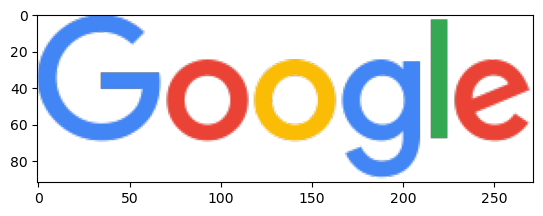

In [39]:
import matplotlib.pyplot as plt
plt.imshow(img)

## BeautifulSoup를 사용하여 데이터 추출하기

In [40]:
import requests
res = requests.get('http://naver.com')
res.status_code

200

In [41]:
res.text[10000:11000]

'%EB%9E%AD%EA%B8%80%EB%9F%AC%204XE%20%EC%98%A4%EB%84%88%ED%8F%89%EA%B0%80","image":{"url":"https://s.pstatic.net/dthumb.phinf/?src=%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20230814_1095%2Fupload_1691993680071jgz7q.jpg%22&type=nf365_240&service=navermain"},"_id":"6441ca92c499cc07f334c5d0"},{"@type":"MATERIAL-PC-FEED","title":"기아 EV9","url":"https://search.naver.com/search.naver?where=m&sm=mtb_etc&mra=bjg1&pkid=128&os=30881861&qvt=0&query=2024%20EV9%20%EC%98%A4%EB%84%88%ED%8F%89%EA%B0%80","image":{"url":"https://s.pstatic.net/dthumb.phinf/?src=%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20230814_1095%2Fupload_1691993603915Bjrmd.jpg%22&type=nf365_240&service=navermain"},"_id":"6441ca92c499cc07f334c5d1"}],"excludeInPaging":false,"positionForPaging":0,"realtime":false,"title":"마이카 오너평가","moreText":"오너평가 하러가기","moreUrl":"https://mycar.naver.com/?topCardType=owner-review","needCologger":false,"ad":false,"@type":"PC-FEED-BLOCK","@code":"PC-FEED-CARGAM

In [42]:
html_text = res.text

In [43]:
from bs4 import BeautifulSoup
bs = BeautifulSoup(html_text, 'html.parser')
type(bs)

bs4.BeautifulSoup

In [46]:
print(bs.prettify())

<!DOCTYPE html>
<html class="fzoom" lang="ko">
 <head>
  <meta charset="utf-8"/>
  <meta content="origin" name="Referrer"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=1190" name="viewport"/>
  <title>
   NAVER
  </title>
  <meta content="NAVER" name="apple-mobile-web-app-title">
   <meta content="index,nofollow" name="robots">
    <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description">
     <meta content="네이버" property="og:title"/>
     <meta content="https://www.naver.com/" property="og:url"/>
     <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/>
     <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description">
      <meta content="summary" name="twitter:card"/>
      <meta content="" name="twitter:title"/>
      <meta content="https://www.naver.com/" name="twitter:url"/>
      <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_

In [47]:
bs.title, type(bs.title)

(<title>NAVER</title>, bs4.element.Tag)

In [48]:
bs.title.name, bs.title.text, type(bs.title.text)

('title', 'NAVER', str)

In [49]:
bs.title.string, type(bs.title.string)

('NAVER', bs4.element.NavigableString)

In [50]:
bs.div

<div id="u_skip"> <a href="#topAsideButton"><span>상단영역 바로가기</span></a> <a href="#shortcutArea"><span>서비스 메뉴 바로가기</span></a> <a href="#newsstand"><span>새소식 블록 바로가기</span></a> <a href="#shopping"><span>쇼핑 블록 바로가기</span></a> <a href="#feed"><span>관심사 블록 바로가기</span></a> <a href="#account"><span>MY 영역 바로가기</span></a> <a href="#widgetboard"><span>위젯 보드 바로가기</span></a> <a href="#viewSetting"><span>보기 설정 바로가기</span></a> </div>

In [51]:
bs.meta   # <meta charset="utf-8"/>

<meta charset="utf-8"/>

In [52]:
bs.meta['charset']    # 'utf-8'

'utf-8'

In [53]:
bs.image, type(bs.image)

(None, NoneType)

In [54]:
bs.head.text

'     NAVER                       '

In [55]:
bs.div.text

' 상단영역 바로가기 서비스 메뉴 바로가기 새소식 블록 바로가기 쇼핑 블록 바로가기 관심사 블록 바로가기 MY 영역 바로가기 위젯 보드 바로가기 보기 설정 바로가기 '

In [56]:
bs.div.a.span.text

'상단영역 바로가기'

In [57]:
bs.div.contents

[' ',
 <a href="#topAsideButton"><span>상단영역 바로가기</span></a>,
 ' ',
 <a href="#shortcutArea"><span>서비스 메뉴 바로가기</span></a>,
 ' ',
 <a href="#newsstand"><span>새소식 블록 바로가기</span></a>,
 ' ',
 <a href="#shopping"><span>쇼핑 블록 바로가기</span></a>,
 ' ',
 <a href="#feed"><span>관심사 블록 바로가기</span></a>,
 ' ',
 <a href="#account"><span>MY 영역 바로가기</span></a>,
 ' ',
 <a href="#widgetboard"><span>위젯 보드 바로가기</span></a>,
 ' ',
 <a href="#viewSetting"><span>보기 설정 바로가기</span></a>,
 ' ']

In [58]:
from bs4.element import Tag
cont = bs.div.contents
type(cont)      # list
type(cont[0])   # bs4.element.NavigableString
type(cont[1])   # bs4.element.Tag
isinstance(cont[1], Tag)  # True

True

In [ ]:
# bs4는 Beautiful Soup 4 라이브러리의 줄임말로, 웹 스크래핑과 파싱을 위한 파이썬 라이브러리입니다. 
# Beautiful Soup은 HTML 및 XML 문서를 파싱하고 검색하는 데 사용되며, 
# 웹페이지의 구조를 분석하여 원하는 데이터를 추출하고 조작할 수 있는 강력한 도구입니다.
# Beautiful Soup 4는 bs4 모듈로써 파이썬에서 다양한 웹 스크래핑 작업을 수행할 수 있도록 도와줍니다. 
# 이 라이브러리를 사용하면 웹페이지의 HTML 구조를 이해하고 원하는 요소를 선택하고 조작하는 등 다양한 작업을 수행할 수 있습니다. 
# 예를 들어, BeautifulSoup 클래스를 사용하여 HTML 코드를 파싱하고, 원하는 요소를 검색하거나 조작할 수 있습니다.

In [ ]:
# bs4는 BeautifulSoup 라이브러리의 패키지명입니다. 
# BeautifulSoup은 웹 크롤링 및 스크래핑을 위한 HTML과 XML 파서 라이브러리로, bs4 패키지에 포함되어 있습니다. 
# 패키지 이름 bs4의 'bs'는 'BeautifulSoup'의 줄임말이고, '4'는 이 패키지가 BeautifulSoup의 네 번째 버전임을 나타냅니다. 
# BeautifulSoup 라이브러리의 첫 번째 버전은 2004년에 릴리즈되었으며, 
# 현재 널리 사용되는 네 번째 버전인 BeautifulSoup4까지 발전했습니다. 
# 따라서 from bs4 import BeautifulSoup 구문은 bs4 패키지에서 BeautifulSoup 클래스를 가져오는 것으로 이해할 수 있습니다. 
# 이 클래스를 사용하여 HTML과 XML 문서를 손쉽게 파싱하고 다룰 수 있습니다. 
# 이렇게 하면 원하는 데이터를 더 쉽게 추출할 수 있으므로 웹 크롤링 및 스크래핑 작업이 간편해집니다.

In [59]:
from bs4.element import Tag
cont = bs.div.contents

[item for item in cont if isinstance(item, Tag)]

[<a href="#topAsideButton"><span>상단영역 바로가기</span></a>,
 <a href="#shortcutArea"><span>서비스 메뉴 바로가기</span></a>,
 <a href="#newsstand"><span>새소식 블록 바로가기</span></a>,
 <a href="#shopping"><span>쇼핑 블록 바로가기</span></a>,
 <a href="#feed"><span>관심사 블록 바로가기</span></a>,
 <a href="#account"><span>MY 영역 바로가기</span></a>,
 <a href="#widgetboard"><span>위젯 보드 바로가기</span></a>,
 <a href="#viewSetting"><span>보기 설정 바로가기</span></a>]

In [60]:
a_list = [item for item in cont if isinstance(item, Tag)]
a_list

[<a href="#topAsideButton"><span>상단영역 바로가기</span></a>,
 <a href="#shortcutArea"><span>서비스 메뉴 바로가기</span></a>,
 <a href="#newsstand"><span>새소식 블록 바로가기</span></a>,
 <a href="#shopping"><span>쇼핑 블록 바로가기</span></a>,
 <a href="#feed"><span>관심사 블록 바로가기</span></a>,
 <a href="#account"><span>MY 영역 바로가기</span></a>,
 <a href="#widgetboard"><span>위젯 보드 바로가기</span></a>,
 <a href="#viewSetting"><span>보기 설정 바로가기</span></a>]

In [61]:
for a in a_list:
    print(a.span.text)

상단영역 바로가기
서비스 메뉴 바로가기
새소식 블록 바로가기
쇼핑 블록 바로가기
관심사 블록 바로가기
MY 영역 바로가기
위젯 보드 바로가기
보기 설정 바로가기


In [62]:
# 문제) 위 내용에 인덱스 번호를 붙여서 표시하세요

for i, a in enumerate(a_list, start=1):
    print('{}.{}'.format(i, a.span.text))

1.상단영역 바로가기
2.서비스 메뉴 바로가기
3.새소식 블록 바로가기
4.쇼핑 블록 바로가기
5.관심사 블록 바로가기
6.MY 영역 바로가기
7.위젯 보드 바로가기
8.보기 설정 바로가기


In [63]:
bs.span

<span>상단영역 바로가기</span>

In [64]:
bs.find_all('span')

[<span>상단영역 바로가기</span>,
 <span>서비스 메뉴 바로가기</span>,
 <span>새소식 블록 바로가기</span>,
 <span>쇼핑 블록 바로가기</span>,
 <span>관심사 블록 바로가기</span>,
 <span>MY 영역 바로가기</span>,
 <span>위젯 보드 바로가기</span>,
 <span>보기 설정 바로가기</span>,
 <span class="ico_btn_search" id="search-btn"></span>,
 <span class="blind">검색</span>,
 <span class="keybord_text"> <span class="blind">입력도구</span> </span>,
 <span class="blind">입력도구</span>,
 <span class="blind">자동완성/최근검색어펼치기</span>,
 <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span><span>@txt@</span></span>,
 <span class="common_ico_kwd"><i class="imsc ico_search"></i></span>,
 <span>@txt@</span>,
 <span class="etc"> <em class="date">@date@.</em> <a aria-pressed="false" class="bt_item _del" href="#" role="button"><i class="imsc ico_del">삭제</i></a> </span>,
 <span class="kwd_dsc">설정이 초기화 된다면 <a class="kwd_help" data-clk="sly.help" href="https://help.naver.com/support/alias/search/word/word_29.naver" target="_blank">도움말</a>을 확인해주세요.</span>,
 <sp

In [65]:
bs.find_all('span')[:8]

[<span>상단영역 바로가기</span>,
 <span>서비스 메뉴 바로가기</span>,
 <span>새소식 블록 바로가기</span>,
 <span>쇼핑 블록 바로가기</span>,
 <span>관심사 블록 바로가기</span>,
 <span>MY 영역 바로가기</span>,
 <span>위젯 보드 바로가기</span>,
 <span>보기 설정 바로가기</span>]

In [66]:
# 위의 값에 데이터만 일부 추출해서 화면에 표시해보세요(7행까지)

for span in bs.find_all('span')[:8]:
    print(span.text)

상단영역 바로가기
서비스 메뉴 바로가기
새소식 블록 바로가기
쇼핑 블록 바로가기
관심사 블록 바로가기
MY 영역 바로가기
위젯 보드 바로가기
보기 설정 바로가기


In [67]:
bs.find('p')

<p class="dsc"> <i class="imsc ico_election"></i><span class="_alert_passage"></span> </p>

In [68]:
type(bs.find('p'))     # bs4.element.Tag

bs4.element.Tag

In [69]:
bs.find_all('p')

[<p class="dsc"> <i class="imsc ico_election"></i><span class="_alert_passage"></span> </p>,
 <p class="dsc">ON/OFF 설정은<br/>해당기기(브라우저)에 저장됩니다.</p>,
 <p class="dsc"><em class="txt">동일한 시간대/연령/남녀별</em> 사용자 그룹의<br/>관심사에 맞춰 자동완성을 제공합니다.</p>]

In [70]:
type(bs.find_all('p'))   # bs4.element.ResultSet => list

bs4.element.ResultSet

In [71]:
dir(bs.find_all('p'))

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort',
 'source']

In [72]:
for p in bs.find_all('p'):
    print(type(p))   # <class 'bs4.element.Tag'>

<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>


In [73]:
for p in bs.find_all('p'):
    print(p.text[:20])

  
ON/OFF 설정은해당기기(브라우저)
동일한 시간대/연령/남녀별 사용자 그


In [74]:
# 문제) a 태그 20개를 가져와서 화면에 표시한다
# 그 중에 주소 연결이 가능한 첫번재 태그의 href 속성의 값을 추출한다
# 추출된 url으로 접속하여 그 페이지를 가져와서 화면에 표시해보세요

# 내가 푼 것

bs.find_all('a')[:20]

[<a href="#topAsideButton"><span>상단영역 바로가기</span></a>,
 <a href="#shortcutArea"><span>서비스 메뉴 바로가기</span></a>,
 <a href="#newsstand"><span>새소식 블록 바로가기</span></a>,
 <a href="#shopping"><span>쇼핑 블록 바로가기</span></a>,
 <a href="#feed"><span>관심사 블록 바로가기</span></a>,
 <a href="#account"><span>MY 영역 바로가기</span></a>,
 <a href="#widgetboard"><span>위젯 보드 바로가기</span></a>,
 <a href="#viewSetting"><span>보기 설정 바로가기</span></a>,
 <a aria-pressed="false" class="item _delAll" href="#" role="button">전체삭제</a>,
 <a class="kwd" href="#"> <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span><span>@txt@</span></span> </a>,
 <a aria-pressed="false" class="bt_item _del" href="#" role="button"><i class="imsc ico_del">삭제</i></a>,
 <a class="kwd_help" data-clk="sly.help" href="https://help.naver.com/support/alias/search/word/word_29.naver" target="_blank">도움말</a>,
 <a class="kwd_help" data-clk="sly.help" href="https://help.naver.com/support/alias/search/word/word_29.naver" target="_bla

In [75]:
# 내가 푼 것

bs.find_all('a')[:20][12]

<a class="kwd_help" data-clk="sly.help" href="https://help.naver.com/support/alias/search/word/word_29.naver" target="_blank">도움말</a>

In [76]:
# 내가 푼 것

import requests
res = requests.get('https://help.naver.com/support/alias/search/word/word_29.naver')
res.status_code

html_text = res.text

from bs4 import BeautifulSoup
bs = BeautifulSoup(html_text, 'html.parser')

print(bs.prettify())

<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <link href="https://ssl.pstatic.net/static/help/new_help/img/favicon.png" rel="shortcut icon" type="image/x-icon"/>
  <meta content="https://ssl.pstatic.net/static/help/new_help/img/og_image.png" property="og:image"/>
  <meta content="https://help.naver.com/service/5627/contents/9148?lang=ko" property="og:url"/>
  <meta content="summary" name="twitter:card"/>
  <meta content="https://ssl.pstatic.net/static/help/new_help/img/og_image.png" name="twitter:image"/>
  <meta content="네이버 고객센터" name="twitter:domain"/>
  <link href="https://editor-static.pstatic.net/v/basic/1.40.0/css/se.viewer.css" rel="stylesheet"/>
  <link href="https://editor-static.pstatic.net/v/basic/1.40.0/css/se.viewer.dark.css" rel="stylesheet"/>
  <script type="text/javascript">
   var callbackUpload = function (data) {
            alert('callbackUpload script')
          }
  </script>
  <title>
   최근검색어가 사라진 경우 : 검색어 고객센터
  </title>
  <meta content="최근검색어가 사라

In [77]:
# 문제) a 태그 20개를 가져와서 화면에 표시한다
# 그 중에 주소 연결이 가능한 첫번재 태그의 href 속성의 값을 추출한다
# 추출된 url으로 접속하여 그 페이지를 가져와서 화면에 표시해보세요

# 강사님 버전(1000글자만 가져오기)

from bs4 import BeautifulSoup
import requests
res =  requests.get('http://naver.com')
bs = BeautifulSoup(res.text, parser='html.parser')
for a in bs.find_all('a'):
    if not a['href'].startswith('#'):
        url = a['href']
        data = requests.get(url)
        break

data.text[:1000]  # 파이썬의 문자열이나 리스트는 슬라이싱이 가능하므로 1000자까지 보고 싶을 때 .text[:1000]

'<!DOCTYPE html><html><head><meta charSet="utf-8"/><link rel="shortcut icon" type="image/x-icon" href="https://ssl.pstatic.net/static/help/new_help/img/favicon.png"/><meta property="og:image" content="https://ssl.pstatic.net/static/help/new_help/img/og_image.png"/><meta property="og:url" content="https://help.naver.com/service/5627/contents/9148?lang=ko"/><meta name="twitter:card" content="summary"/><meta name="twitter:image" content="https://ssl.pstatic.net/static/help/new_help/img/og_image.png"/><meta name="twitter:domain" content="네이버 고객센터"/><link href="https://editor-static.pstatic.net/v/basic/1.40.0/css/se.viewer.css" rel="stylesheet"/><link href="https://editor-static.pstatic.net/v/basic/1.40.0/css/se.viewer.dark.css" rel="stylesheet"/><script type="text/javascript">\n          var callbackUpload = function (data) {\n            alert(\'callbackUpload script\')\n          }\n        </script><title>최근검색어가 사라진 경우 : 검색어 고객센터</title><meta property="og:title" content="최근검색어가 사라진 경우 :

In [78]:
# 태그명과  속성을 이용하여 특정 태그 선택하기
bs.find('div', class_='div1')
bs.find('div', align = 'left')
bs.find('div', attrs={'class_':'cls1', 'align':'center'})

In [79]:
bs.find_all('div')

[<div id="u_skip"> <a href="#topAsideButton"><span>상단영역 바로가기</span></a> <a href="#shortcutArea"><span>서비스 메뉴 바로가기</span></a> <a href="#newsstand"><span>새소식 블록 바로가기</span></a> <a href="#shopping"><span>쇼핑 블록 바로가기</span></a> <a href="#feed"><span>관심사 블록 바로가기</span></a> <a href="#account"><span>MY 영역 바로가기</span></a> <a href="#widgetboard"><span>위젯 보드 바로가기</span></a> <a href="#viewSetting"><span>보기 설정 바로가기</span></a> </div>,
 <div id="wrap"> <div id="header" role="banner"> <div class="header_inner" id="topSearchWrap"> <div class="search_special_bg" id="special-logo"></div> <div class="ad_area" id="timeboard-ex" style="min-width:1340px"> </div> <div class="search_area" id="search_area" style="border-color:#fff"> <div class="link_search_special" id="special-input-logo-ex" style="display:none"></div> <div class="search_group"> <div class="search_group_inner" id="search"> <h1 class="search_logo" id="special-input-logo"></h1> <form action="https://search.naver.com/search.naver" id="sform" metho

In [171]:
# 문제) 위 내용 중에서 
# <div class="option"> <a aria-pressed="false" class="item _delAll" href="#" role="button">전체삭제</a> </div> 
# 내용 중에서 텍스트 '전체삭제' 내용만 가져와보세요

# 풀이: 동일 클래스명 여러 개 있을 수 있으니 먼저 find_all()로 다 가져와서 확인 후 해당 행 인덱스를 가져오면 됨

div = bs.find_all('div', class_='option')[0] 
div.a.text    # div 태그 안에 또 a태그 안에 데이터가 있으므로 점을 찍어서 객체 내부에서 가져옴

'전체삭제'

In [80]:
bs.find_all('div')

[<div id="u_skip"> <a href="#topAsideButton"><span>상단영역 바로가기</span></a> <a href="#shortcutArea"><span>서비스 메뉴 바로가기</span></a> <a href="#newsstand"><span>새소식 블록 바로가기</span></a> <a href="#shopping"><span>쇼핑 블록 바로가기</span></a> <a href="#feed"><span>관심사 블록 바로가기</span></a> <a href="#account"><span>MY 영역 바로가기</span></a> <a href="#widgetboard"><span>위젯 보드 바로가기</span></a> <a href="#viewSetting"><span>보기 설정 바로가기</span></a> </div>,
 <div id="wrap"> <div id="header" role="banner"> <div class="header_inner" id="topSearchWrap"> <div class="search_special_bg" id="special-logo"></div> <div class="ad_area" id="timeboard-ex" style="min-width:1340px"> </div> <div class="search_area" id="search_area" style="border-color:#fff"> <div class="link_search_special" id="special-input-logo-ex" style="display:none"></div> <div class="search_group"> <div class="search_group_inner" id="search"> <h1 class="search_logo" id="special-input-logo"></h1> <form action="https://search.naver.com/search.naver" id="sform" metho

In [81]:
# css 셀렉터를 이용한 태그 선택

bs.select('#NM_FAVOITE a') # 아이디로 찾기 => css 셀렉터는 공백을 주면 자손 셀렉터를 줄 수 있음

# 결과 '[]' =>  태그 NM_FAVOITE 안의 a 태그 찾기: 아이디 NM_FAVOITE a 에 해당하는 태그 없음 

[]

In [82]:
bs.select('#u_skip a')  # bs.find_all('div')를 출력했을 때 u_skip a 태그 확인되고 그 안에 a 태그 있어서 a태그 내용까지 찾기

[<a href="#topAsideButton"><span>상단영역 바로가기</span></a>,
 <a href="#shortcutArea"><span>서비스 메뉴 바로가기</span></a>,
 <a href="#newsstand"><span>새소식 블록 바로가기</span></a>,
 <a href="#shopping"><span>쇼핑 블록 바로가기</span></a>,
 <a href="#feed"><span>관심사 블록 바로가기</span></a>,
 <a href="#account"><span>MY 영역 바로가기</span></a>,
 <a href="#widgetboard"><span>위젯 보드 바로가기</span></a>,
 <a href="#viewSetting"><span>보기 설정 바로가기</span></a>]

In [83]:
bs.select('#u_skip a span')   #  a태그 안의 span 내용까지 찾기

[<span>상단영역 바로가기</span>,
 <span>서비스 메뉴 바로가기</span>,
 <span>새소식 블록 바로가기</span>,
 <span>쇼핑 블록 바로가기</span>,
 <span>관심사 블록 바로가기</span>,
 <span>MY 영역 바로가기</span>,
 <span>위젯 보드 바로가기</span>,
 <span>보기 설정 바로가기</span>]

In [84]:
# css 셀렉터를 이용한 태그 선택

result = bs.select('#u_skip a span')
type(result)   #  bs4.element.ResultSet
for span in result:
    print(span.text)

상단영역 바로가기
서비스 메뉴 바로가기
새소식 블록 바로가기
쇼핑 블록 바로가기
관심사 블록 바로가기
MY 영역 바로가기
위젯 보드 바로가기
보기 설정 바로가기


In [ ]:
# 문제) https://finance.naver.com/ 에서 거래 상위 top5에 속하는 제목 가져오기

In [ ]:
# 내가 푼 것 => 끝까지 다 못 품

# => 일단 개발자 도구에서 top5 찾아서 각각 코드 복사(마우스 오른쪽 copy> copy element 클릭) 

# <a href="/item/main.naver?code=251340" onclick="clickcr(this, &quot;spe.slist&quot;, &quot;251340&quot;, &quot;1&quot;, event);">KODEX 코스닥150선물인버스</a>
# <a href="/item/main.naver?code=252670" onclick="clickcr(this, &quot;spe.slist&quot;, &quot;252670&quot;, &quot;2&quot;, event);">KODEX 200선물인버스2X</a>
# <a href="/item/main.naver?code=003060" onclick="clickcr(this, &quot;spe.slist&quot;, &quot;003060&quot;, &quot;3&quot;, event);">에이프로젠바이오로직스</a>
# <a href="/item/main.naver?code=007460" onclick="clickcr(this, &quot;spe.clist&quot;, &quot;007460&quot;, &quot;10&quot;, event);">에이프로젠</a>
# <a href="/item/main.naver?code=037330" onclick="clickcr(this, &quot;spe.slist&quot;, &quot;037330&quot;, &quot;5&quot;, event);">인지디스플레</a>

In [85]:
# 강사님 푸신 것

import requests
from bs4 import BeautifulSoup

res =  requests.get('http://finance.naver.com/')
res
bs = BeautifulSoup(res.text, parser='html.parser')
for a in bs.select('#_topItems1 tr th a')[:5]:
    print(a.text)

KODEX 코스닥150선물인버스
KODEX 200선물인버스2X
스킨앤스킨
삼부토건
코리아나


In [197]:
# 문제) itemno, sector
# DataFrame 생성 / 화면 표시/ naver_finace_topitem1.csv에 저장

In [86]:
# 내가 푼 것
# 데이터 프레임까지만 만듬

from pandas import Series, DataFrame
import pandas as pd
import numpy as np

df = DataFrame({'one':'KODEX 코스닥150선물인버스','two':'KODEX 200선물인버스2X','three':'에이프로젠바이오로직스','four':'에이프로젠','five':'인지디스플레이',}, index= ['top1', 'top2', 'top3', 'top4', 'top5'])
print(df)

                    one               two        three   four     five
top1  KODEX 코스닥150선물인버스  KODEX 200선물인버스2X  에이프로젠바이오로직스  에이프로젠  인지디스플레이
top2  KODEX 코스닥150선물인버스  KODEX 200선물인버스2X  에이프로젠바이오로직스  에이프로젠  인지디스플레이
top3  KODEX 코스닥150선물인버스  KODEX 200선물인버스2X  에이프로젠바이오로직스  에이프로젠  인지디스플레이
top4  KODEX 코스닥150선물인버스  KODEX 200선물인버스2X  에이프로젠바이오로직스  에이프로젠  인지디스플레이
top5  KODEX 코스닥150선물인버스  KODEX 200선물인버스2X  에이프로젠바이오로직스  에이프로젠  인지디스플레이


In [ ]:
# 문제) itemno, sector
# DataFrame 생성 / 화면 표시/ naver_finace_topitem1.csv에 저장

In [87]:
# 강사님 버전

import requests
from bs4 import BeautifulSoup
res =  requests.get('http://finance.naver.com/')
bs = BeautifulSoup(res.text, parser='html.parser')   # parser를 쓰는 이유는 html로 파싱하기 때문
# HTML 문서를 데이터프레임으로 파싱한다


num_list=[]
sec_list=[]

for i, a  in enumerate(bs.select('#_topItems1 tr th a')[:5], start=1):
    num_list.append(i)
    sec_list.append(a.text)
    
df = pd.DataFrame({'순위: ':num_list, '종목: ':sec_list})
df

,순위:,종목:
0,1,KODEX 코스닥150선물인버스
1,2,KODEX 200선물인버스2X
2,3,스킨앤스킨
3,4,삼부토건
4,5,코리아나


In [88]:
# 수집된 데이터를 파일에 저장
df.to_csv('naver_finance_topitems1.csv', index=False)
print('파일에 저장 성공')

파일에 저장 성공


In [89]:
# 파일에 저장된 csv 파일을 로드하여 DataFrame 생성[저장된 파일 읽어오기]
df2 = pd.read_csv('naver_finance_topitems1.csv')
df2

,순위:,종목:
0,1,KODEX 코스닥150선물인버스
1,2,KODEX 200선물인버스2X
2,3,스킨앤스킨
3,4,삼부토건
4,5,코리아나


In [91]:
# html, xml, json, yaml

import requests
from bs4 import BeautifulSoup

site_url = 'http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp'
res = requests.get(site_url)
if res.status_code !=200:
    print('사이트 접속 실패')
    exit()
res.encoding = 'utf-8'

bs = BeautifulSoup(res.text, parser='xml')    # parser='xml' 써도 되고 parser='xml.parser'로 써도 됨[빨간 오류 나도 괜찮음]
bs

result = []
locations = bs.select('location')
for loc in locations:
    city = loc.find('city').text.strip()
    print(city)

서울
인천
수원
파주
이천
평택
춘천
원주
강릉
대전
세종
홍성
청주
충주
영동
광주
목포
여수
순천
광양
나주
전주
군산
정읍
남원
고창
무주
부산
울산
창원
진주
거창
통영
대구
안동
포항
경주
울진
울릉도
제주
서귀포


## bs를 사용한 태그 접근법 정리
- bs = BeautifulSoup('html_text','html.parser')
- bs.p.text: 첫번째 p태그 내의 모든 하위 태그 포함하여 텍스트 추출
- bs.p.string: 첫번째 p태그가 가진 텍스트만 추출
- bs.find('p'): 첫번째 p태그를 Tag 객체로 리턴
- bs.find('p', align='left'): 지정한 속성을 가진 첫번째 p태그
- bs.find(class_='title'): 태그 중에서 지정된 속성을 가진 태그 한개
- bs.find_all('p'): 모든 p태그들   (태그 이름을 통해 찾기에 적합)
- bs.find_all('p',class_='option') 
- bs.select('p'): 모든 p태그들 (CSS 선택자를 사용한 검색에 더 적합)
- bs.select('p a'): 자손 (p의 자손인 a 태그들)
- bs.select('p>a'): 자식 (p의 바로 아래 자식 a태그들)
- bs.select('#title'): 태그의 id='title'인 태그
- bs.select('.desc'): 태그의 class='desc'인 태그들
- bs.select('[align=left]'): 지정된 속성을 가진 모든 태그들 

In [92]:
# 기상청 사이트에서 날씨 정보 가져오기

from pandas import Series, DataFrame
import pandas as pd

import requests
from bs4 import BeautifulSoup
res = requests.get('http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp')
# 위 주소는 링크에서 얻은 것임
bs = BeautifulSoup(res.text, parser = 'xml')   # parser='xml' 써도 되고 parser='xml.parser'로 써도 됨[빨간 오류 나도 괜찮음]

num_list = []
sec_list = []
tmef_list = []
wf_list = []
tmn_list = []
tmx_list = []

locations = bs.select('location')
for i, loc in enumerate(locations[:600], start=1):
    data_list = loc.select('data')
    for data in data_list:    
# for data in data_list에서 data를 출력해보면 tmEf가 소문자 E임을 알 수 있음 소문자로 수정해야 함
        num_list.append(i)
        sec_list.append(loc.city.text)
        tmef_list.append(data.tmef.text)
        wf_list.append(data.wf.text)
        tmn_list.append(data.tmn.text)
        tmx_list.append(data.tmx.text)   
                        
df = pd.DataFrame({'지역': sec_list, '날짜': tmef_list, '예보': wf_list, '최저': tmn_list, '최고': tmx_list})
df

,지역,날짜,예보,최저,최고
0,서울,2023-08-23 00:00,흐리고 비,25,28
1,서울,2023-08-23 12:00,흐리고 비,25,28
2,서울,2023-08-24 00:00,흐리고 비,24,29
3,서울,2023-08-24 12:00,흐리고 비,24,29
4,서울,2023-08-25 00:00,흐림,24,30
...,...,...,...,...,...
528,서귀포,2023-08-27 00:00,구름많음,25,30
529,서귀포,2023-08-27 12:00,구름많음,25,30
530,서귀포,2023-08-28 00:00,흐림,25,29
531,서귀포,2023-08-29 00:00,흐림,25,30


In [93]:
# 수집된 데이터를 파일에 저장
df.to_csv('kma_data.csv', index=False)
print('파일에 저장 성공')

파일에 저장 성공


In [94]:
# 파일에 저장된 csv 파일을 로드하여 DataFrame 생성[저장된 파일 읽어오기]
df2 = pd.read_csv('kma_data.csv')
df2

,지역,날짜,예보,최저,최고
0,서울,2023-08-23 00:00,흐리고 비,25,28
1,서울,2023-08-23 12:00,흐리고 비,25,28
2,서울,2023-08-24 00:00,흐리고 비,24,29
3,서울,2023-08-24 12:00,흐리고 비,24,29
4,서울,2023-08-25 00:00,흐림,24,30
...,...,...,...,...,...
528,서귀포,2023-08-27 00:00,구름많음,25,30
529,서귀포,2023-08-27 12:00,구름많음,25,30
530,서귀포,2023-08-28 00:00,흐림,25,29
531,서귀포,2023-08-29 00:00,흐림,25,30


In [96]:
# 위 문제 강사님 버전


# html, xml, json, yaml

import requests
from bs4 import BeautifulSoup

site_url = 'http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp'
res = requests.get(site_url)
if res.status_code !=200:
    print('사이트 접속 실패')
    exit()
res.encoding = 'utf-8'

bs = BeautifulSoup(res.text, parser='xml.parser')    # parser='xml' 써도 되고 parser='xml.parser'로 써도 됨[빨간 오류 나도 괜찮음]
bs

city_list = []
date_list = []
forecast_list = []
low_list = []
high_list = []


locations = bs.select('location')   # ResultSet
for loc in locations:
    city = loc.find('city').text.strip()
    print(city)
    data13 = loc.find_all('data')   # ResultSet
    for data in data13:
        city_list.append(city)
        date_list.append(data.tmef.text.strip())
        forecast_list.append(data.wf.text.strip())
        low_list.append(data.tmn.text.strip())
        high_list.append(data.tmx.text.strip())

서울
인천
수원
파주
이천
평택
춘천
원주
강릉
대전
세종
홍성
청주
충주
영동
광주
목포
여수
순천
광양
나주
전주
군산
정읍
남원
고창
무주
부산
울산
창원
진주
거창
통영
대구
안동
포항
경주
울진
울릉도
제주
서귀포


In [97]:
import pandas as pd
df_forecast = pd.DataFrame({
    '지역':city_list, '날짜':date_list, '예보':forecast_list, '최저':low_list, '최고':high_list
})
df_forecast

,지역,날짜,예보,최저,최고
0,서울,2023-08-23 00:00,흐리고 비,25,28
1,서울,2023-08-23 12:00,흐리고 비,25,28
2,서울,2023-08-24 00:00,흐리고 비,24,29
3,서울,2023-08-24 12:00,흐리고 비,24,29
4,서울,2023-08-25 00:00,흐림,24,30
...,...,...,...,...,...
528,서귀포,2023-08-27 00:00,구름많음,25,30
529,서귀포,2023-08-27 12:00,구름많음,25,30
530,서귀포,2023-08-28 00:00,흐림,25,29
531,서귀포,2023-08-29 00:00,흐림,25,30


In [99]:
# 수집된 데이터를 파일에 저장
df_forecast.to_csv('kma_weather.csv', index=False)
print('kma_weather.csv 파일에 저장 성공')

kma_weather.csv 파일에 저장 성공


In [100]:
# 파일에 저장된 csv 파일을 로드하여 DataFrame 생성[저장된 파일 읽어오기]
df2 = pd.read_csv('kma_weather.csv')
df2

,지역,날짜,예보,최저,최고
0,서울,2023-08-23 00:00,흐리고 비,25,28
1,서울,2023-08-23 12:00,흐리고 비,25,28
2,서울,2023-08-24 00:00,흐리고 비,24,29
3,서울,2023-08-24 12:00,흐리고 비,24,29
4,서울,2023-08-25 00:00,흐림,24,30
...,...,...,...,...,...
528,서귀포,2023-08-27 00:00,구름많음,25,30
529,서귀포,2023-08-27 12:00,구름많음,25,30
530,서귀포,2023-08-28 00:00,흐림,25,29
531,서귀포,2023-08-29 00:00,흐림,25,30


In [101]:
# 특정 데이터 찾기 (불리언 인덱싱을 했으므로 행이 반환됨) => 컬럼 기반이나 불리언으로 찾으면 행 반환

df2[(df2['지역']=='서귀포')&(df2['날짜']=='2023-08-25 00:00')]

,지역,날짜,예보,최저,최고
524,서귀포,2023-08-25 00:00,구름많음,26,31


In [ ]:
# 문제) 교보문고에서 머신러닝을 검색해 나온 책들의 정보를 제목, 저자, 출판일, 가격, 인기순위를 가져와서 파일로 저장하기
# 몇 개의 머신러닝 책들이 있을지 모르므로 무한루프 이용
# 데이터가 많아도 코드는 동일하므로 5페이지까지 가져오기
# (개발자 도구 사용해 코드 정보 확인)

# 파일 제목은 kyobobook_ml.csv로 할 것

In [102]:
# 내가 푼 것  => 인기순은 한 페이지 정보만 가져왔음, 그리고 책은 한 권 정보만 가져옴

# html, xml, json, yaml

import requests
from bs4 import BeautifulSoup
from urllib import request, parse    

param = parse.urlencode({'keyword':'머신러닝', 'gbCode':'TOT', 'target':'total'})  

param   
site_url = 'https://search.kyobobook.co.kr/search?{}'.format(param)
site_url


res = requests.get(site_url)
if res.status_code !=200:
    print('사이트 접속 실패')
    exit()
res.encoding = 'utf-8'

html = res.text
bs = BeautifulSoup(html, 'html.parser')   # parser='xml' 써도 되고 parser='xml.parser'로 써도 됨[빨간 오류 나도 괜찮음]
bs

# 클래스명은 id 값을 사용하는 대신 class 명을 사용.

# 제목
#title_selector = 'a.prod_info > span.prod_alias, a.prod_info > span#cmdtName_S000208505524'   # 클래스명은 점찍고 그냥 씀

title_selector = 'a.prod_info > span[id^="cmdtName_"]'
title_parts = [element.text for element in  bs.select(title_selector)][0]
# title = " ".join(title_parts)  # '알고리즘으로 배우는'과 '인공지능, 머신러닝, 딥러닝' 사이를 띄어쓰고자 큰 따옴표 안에 공백을 줌 
print(title_parts)  # 출력: 알고리즘으로 배우는 인공지능, 머신러닝, 딥러닝

# 저자
author_selector = 'a[class="author rep"]'
author = [element.text for element in bs.select(author_selector)][0]
print(author)

# 출판일
date_selector = 'span.date'
date = [element.text for element in bs.select(date_selector)][0]
print(date)

# 가격
price_selector = 'span.val, span.unit'
price_parts=[element.text for element in bs.select(price_selector)][:2]   # '원' 글자까지 가져오려면 슬라이싱 이용해야 함
price = "".join(price_parts) 
print(price)


# 웹 브라우저면 헤더가 있기 때문에 서버가 데이터를 보내주나 그렇지 않으면 보안상의 문제 때문에 헤더 부분을 가지지 않으면 서버에서 데이터 정보를 보여주지 않기 때문에 빈 리스트만 나오게 됨
# 따라서 다른 페이지의 headers를 이곳에 복붙해서 둠

headers = {
    'authority': 'invest.wessiorfinance.com',
    'accept': 'text/plain, */*; q=0.01',
    'accept-language': 'en-GB,en-US;q=0.9,en;q=0.8,nb;q=0.7,no;q=0.6,sv;q=0.5',
    'cache-control': 'no-cache',
    # 'cookie': 'ci_session=kndj0o4bbor8a6fh8kafqunk3b',
    'pragma': 'no-cache',
    'referer': 'https://invest.wessiorfinance.com/notation.html',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="100", "Google Chrome";v="100"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-origin',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.75 Safari/537.36',
    'x-requested-with': 'XMLHttpRequest',
}

# 책 리스트 가져오기
book_list = bs.find_all(class_='prod_item')

# 'prod_item'은 HTML 코드에서 각 책 정보를 가지고 있는 요소에 적용된 CSS 클래스. 
# 원래 사이트(교보문고)의 HTML 코드를 분석했을 때, 
# 각 책 정보가 이 클래스로 표시되어 있어서 이 클래스를 기준으로 책 리스트를 구분하여 가져온 것

# 인기순위
ranking_list = []
for book in book_list:
    product_url = "https://product.kyobobook.co.kr/detail/" + \
        book.select_one('a.prod_info')['href'].split("/")[-1]
    res2 = requests.get(product_url, headers=headers)
    res2.encoding = 'utf-8'
    html_detail = res2.text
    bs_detail = BeautifulSoup(html_detail, 'html.parser')

    ranking_selector = 'span.rank'
    ranking = bs_detail.select(ranking_selector)

    if ranking:
        rank = ranking[0].text.strip()
    else:
        rank = "순위 정보가 없습니다."

    ranking_list.append(rank)
    if len(ranking_list) >= 20:
        break
print(ranking_list)
# print(ranking_list[0]) => 첫번째 정보만 가져올 때

인공지능, 머신러닝, 딥러닝
김의중
2023년 08월 28일
28,800원 
['402', '순위 정보가 없습니다.', '111', '263', '순위 정보가 없습니다.', '순위 정보가 없습니다.', '순위 정보가 없습니다.', '순위 정보가 없습니다.', '585', '912', '687', '372', '순위 정보가 없습니다.', '순위 정보가 없습니다.', '순위 정보가 없습니다.', '순위 정보가 없습니다.', '113', '순위 정보가 없습니다.', '순위 정보가 없습니다.', '960']


In [103]:
# 값은 나오지 않음 => 페이지 처리중 쓰는 방법만 참고

import pandas as pd

def get_book_info(page_number):
    books = []
    # 여기서 각 책에 대한 정보를 추출하고 (`title`, `author`, `date`, `price`, `rank` 값을 가지는 리스트)를 사용하여
    # books 리스트에 추가하는 코드를 작성하세요. 지금까지 작성한 코드를 이 함수에 맞게 수정할 필요가 있습니다.
    
    # 예시: books.append([title, author, date, price, rank])
    
    return pd.DataFrame(books, columns=['제목', '저자', '출판일', '가격', '인기순위'])

dataframes = []
for i in range(1, 6):  
    print(f'페이지 {i} 처리중...')
    dataframes.append(get_book_info(i))

all_books = pd.concat(dataframes, ignore_index=True)
print(all_books)


페이지 1 처리중...
페이지 2 처리중...
페이지 3 처리중...
페이지 4 처리중...
페이지 5 처리중...
Empty DataFrame
Columns: [제목, 저자, 출판일, 가격, 인기순위]
Index: []


In [ ]:
# 강사님 버전

### 교보문고 사이트에서 '머신러닝' 으로 검색하여 나온 결과 csv에 저장
- https://search.kyobobook.co.kr/search?keyword=%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D&target=total&gbCode=TOT
- https://search.kyobobook.co.kr/search?keyword=%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D&target=total&gbCode=TOT&page=2
- kyobobook_ml.csv
- 제목 저자 출판사 출판일 가격 인기순위

### requests.get(url) 정상 접속되더라도 res.text가 비어 있는 경우
- 요청시에 헤더 정보를 추가해본다
- requests.get(url, headers=headers)
- 헤더정보는 아래의 내용처럼 작성한다

In [104]:
def get_page_info(li_set):
    for li in li_set:
        a_set = li.find_all('a', class_='prod_info')
        for a in a_set:
            span_set = a.find_all('span')
            for span in span_set:
                id = span.attrs.get('id')
                if id is not None:
                    if id.startswith('cmdtName_'):
                        print(span.text)
                        title_lst.append(span.text.strip())
        author = li.find('a', class_='author rep').text.strip()
        author_lst.append(author)
        print(author)
        
        pub = li.find('div', class_='prod_publish').a.text.strip()
        pub_lst.append(pub)
        
        date = li.find('span', class_='date').text.strip()
        date_lst.append(date)
        print(pub, date)
        
        price = li.find('span', class_='price').find('span', class_='val').text.strip()
        price_lst.append(price)
        print(price)
        
        rank_url = li.find('a', class_='prod_info')['href']
        print(rank_url)
        
        res2 = requests.get(rank_url, headers=headers)
        if res2.status_code==200:
            bs2 = BeautifulSoup(res2.text, parser='html.parser')
            span_rank = bs2.find('span', class_='rank')
            rank = None if span_rank is None else span_rank.text.strip()
            rank_lst.append(rank)
            print('주간베스트', rank)

In [105]:
headers = {
    'authority': 'invest.wessiorfinance.com',
    'accept': 'text/plain, */*; q=0.01',
    'accept-language': 'en-GB,en-US;q=0.9,en;q=0.8,nb;q=0.7,no;q=0.6,sv;q=0.5',
    'cache-control': 'no-cache',
    # 'cookie': 'ci_session=kndj0o4bbor8a6fh8kafqunk3b',
    'pragma': 'no-cache',
    'referer': 'https://invest.wessiorfinance.com/notation.html',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="100", "Google Chrome";v="100"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-origin',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.75 Safari/537.36',
    'x-requested-with': 'XMLHttpRequest',
}

In [106]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# '머신러닝' 검색을 위한 url
page_urls = [
    'https://search.kyobobook.co.kr/search?keyword=%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D&target=total&gbCode=TOT',
    'https://search.kyobobook.co.kr/search?keyword=%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D&target=total&gbCode=TOT&page=2',
    'https://search.kyobobook.co.kr/search?keyword=%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D&target=total&gbCode=TOT&page=3',
    'https://search.kyobobook.co.kr/search?keyword=%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D&target=total&gbCode=TOT&page=4',
    'https://search.kyobobook.co.kr/search?keyword=%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D&target=total&gbCode=TOT&page=5'
]

# 제목 저자 출판일 가격 인기순위
title_lst = []
author_lst = []
pub_lst = []
date_lst = []
price_lst = []
rank_lst = []

for url in page_urls:
    res = requests.get(url)
    res   # <Response [200]>
    if res.status_code is None:
        print('접속 실패')
        exit()
    res.encoding   # 'UTF-8'
    if res.encoding is None:
        res.encoding = 'utf-8'

    bs = BeautifulSoup(res.text, parser='html.parser')
    
    li_set = bs.select('#shopData_list > ul > li.prod_item')
    #print(len(li_set))
    get_page_info(li_set)

인공지능, 머신러닝, 딥러닝
김의중
미리어드스페이스 2023년 08월 28일
28,800
https://product.kyobobook.co.kr/detail/S000208505524
주간베스트 402
머신 러닝(Machine Learning)
케빈 머피
에이콘출판 2015년 08월 31일
54,000
https://product.kyobobook.co.kr/detail/S000000935760
주간베스트 None
핸즈온 머신러닝
오렐리앙 제롱
한빛미디어 2020년 05월 04일
49,500
https://product.kyobobook.co.kr/detail/S000001810262
주간베스트 111
실전! 컴퓨터비전을 위한 머신러닝
발리아파 락슈마난
위키북스 2023년 07월 18일
31,500
https://product.kyobobook.co.kr/detail/S000202999618
주간베스트 263
머신러닝 디자인 패턴
발리아파 락슈마난
한빛미디어 2021년 11월 01일
34,200
https://product.kyobobook.co.kr/detail/S000001810443
주간베스트 None
살아 움직이는 머신러닝 파이프라인 설계
하네스 하프케
한빛미디어 2021년 10월 11일
28,800
https://product.kyobobook.co.kr/detail/S000001810440
주간베스트 None
자산운용을 위한 금융 머신러닝
마르코스 로페즈 데 프라도
에이콘출판 2021년 01월 26일
18,000
https://product.kyobobook.co.kr/detail/S000001804994
주간베스트 None
그림으로 배우는 StatQuest 머신러닝 강의
조시 스타머
제이펍 2023년 02월 16일
24,300
https://product.kyobobook.co.kr/detail/S000200818856
주간베스트 None
그래프 머신러닝
클라우디오 스타밀레
에이콘출판 2023년 01월 31일
31,500
https://produc

주간베스트 None
컴퓨터비전과 머신러닝
김찬수
광문각 2021년 02월 25일
26,000
https://product.kyobobook.co.kr/detail/S000001090992
주간베스트 None
머신 러닝 딥 러닝에 필요한 기초 수학 with 파이썬
조준우
인사이트 2020년 11월 04일
24,300
https://product.kyobobook.co.kr/detail/S000001033101
주간베스트 None
머신러닝
아라키 마사히로
성안당 2019년 05월 22일
13,500
https://product.kyobobook.co.kr/detail/S000000562138
주간베스트 None
머신러닝(Machine Learning)을 활용한 조세.재정 정책의 평가와 설계
정재현
한국조세재정연구원 2020년 12월 31일
8,000
https://product.kyobobook.co.kr/detail/S000001845613
주간베스트 None
이보다 더 쉬울 수 없는 자바 머신러닝 with Weka
자바라머신러닝
비제이퍼블릭 2021년 01월 25일
22,320
https://ebook-product.kyobobook.co.kr/dig/epd/ebook/E000002955318
주간베스트 None
Do it! 데이터 과학자를 위한 실전 머신러닝
배기웅 저자
이지스퍼블리싱 2023년 08월 21일
18,900
https://ebook-product.kyobobook.co.kr/dig/epd/ebook/E000005368696
주간베스트 None
이보다 더 쉬울 수 없는 자바 머신러닝 with Weka
자바라머신러닝
비제이퍼블릭 2021년 01월 29일
27,900
https://product.kyobobook.co.kr/detail/S000001842172
주간베스트 None
챗GPT와 함께하는 파이썬 & 머신러닝 코딩 마스터
김대우
유페이퍼 2023년 07월 10일
1,000
https://ebook-product.kyobobook.co.kr/

In [107]:
import pandas as pd
df_book = pd.DataFrame({
    '도서명':title_lst, 
    '저자':author_lst, 
    '출판사':pub_lst,
    '출판일':date_lst,
    '가격':price_lst,
    '주간베스트':rank_lst
})
df_book

,도서명,저자,출판사,출판일,가격,주간베스트
0,"인공지능, 머신러닝, 딥러닝",김의중,미리어드스페이스,2023년 08월 28일,"28,800",402
1,머신 러닝(Machine Learning),케빈 머피,에이콘출판,2015년 08월 31일,"54,000",None
2,핸즈온 머신러닝,오렐리앙 제롱,한빛미디어,2020년 05월 04일,"49,500",111
3,실전! 컴퓨터비전을 위한 머신러닝,발리아파 락슈마난,위키북스,2023년 07월 18일,"31,500",263
4,머신러닝 디자인 패턴,발리아파 락슈마난,한빛미디어,2021년 11월 01일,"34,200",None
...,...,...,...,...,...,...
95,플로우가 보이는 머신러닝 프로젝트,임선집,루비페이퍼,2022년 07월 19일,"20,160",None
96,Step by Step CRM을 위한 파이썬 머신러닝,김형수,프레딕스,2023년 05월 01일,"20,700",None
97,머신러닝을 활용한 테러리즘 빅데이터 분석,홍승표,한국공안행정학회,2023년 06월 30일,"6,400",None
98,역직구 상품 추천 및 판매가 추정을 위한 머신러닝 모델,김규익,한국산업경영시스템학회,2023년 06월 30일,"4,000",None


In [108]:
# df_book 을 파일에 저장(kyobobook_ml.csv)
df_book.to_csv('kyobobook_ml.csv', index=False)
print('도서정보 파일에 저장 완료')

도서정보 파일에 저장 완료


In [109]:
# kyobobook_ml.csv 파일을 로드하여 DataFrame 생성
df2 = pd.read_csv('kyobobook_ml.csv')
df2

,도서명,저자,출판사,출판일,가격,주간베스트
0,"인공지능, 머신러닝, 딥러닝",김의중,미리어드스페이스,2023년 08월 28일,"28,800",402.0
1,머신 러닝(Machine Learning),케빈 머피,에이콘출판,2015년 08월 31일,"54,000",NaN
2,핸즈온 머신러닝,오렐리앙 제롱,한빛미디어,2020년 05월 04일,"49,500",111.0
3,실전! 컴퓨터비전을 위한 머신러닝,발리아파 락슈마난,위키북스,2023년 07월 18일,"31,500",263.0
4,머신러닝 디자인 패턴,발리아파 락슈마난,한빛미디어,2021년 11월 01일,"34,200",NaN
...,...,...,...,...,...,...
95,플로우가 보이는 머신러닝 프로젝트,임선집,루비페이퍼,2022년 07월 19일,"20,160",NaN
96,Step by Step CRM을 위한 파이썬 머신러닝,김형수,프레딕스,2023년 05월 01일,"20,700",NaN
97,머신러닝을 활용한 테러리즘 빅데이터 분석,홍승표,한국공안행정학회,2023년 06월 30일,"6,400",NaN
98,역직구 상품 추천 및 판매가 추정을 위한 머신러닝 모델,김규익,한국산업경영시스템학회,2023년 06월 30일,"4,000",NaN


In [110]:
# 주간베스트 순위가 가장 높은 도서 정보
df2[df2['주간베스트']==df2['주간베스트'].min()]

,도서명,저자,출판사,출판일,가격,주간베스트
42,혼자 공부하는 머신러닝+딥러닝,박해선,한빛미디어,2020년 12월 21일,"23,400",27.0


In [111]:
df2.sort_values(by=['주간베스트'], ascending=True)

,도서명,저자,출판사,출판일,가격,주간베스트
42,혼자 공부하는 머신러닝+딥러닝,박해선,한빛미디어,2020년 12월 21일,"23,400",27.0
2,핸즈온 머신러닝,오렐리앙 제롱,한빛미디어,2020년 05월 04일,"49,500",111.0
16,Do it! 데이터 과학자를 위한 실전 머신러닝,배기웅,이지스퍼블리싱,2023년 08월 14일,"27,000",113.0
25,머신러닝 시스템 설계,칩 후옌,한빛미디어,2023년 03월 13일,"34,200",152.0
43,파이썬 머신러닝 완벽 가이드,권철민,위키북스,2022년 04월 21일,"36,000",196.0
...,...,...,...,...,...,...
95,플로우가 보이는 머신러닝 프로젝트,임선집,루비페이퍼,2022년 07월 19일,"20,160",NaN
96,Step by Step CRM을 위한 파이썬 머신러닝,김형수,프레딕스,2023년 05월 01일,"20,700",NaN
97,머신러닝을 활용한 테러리즘 빅데이터 분석,홍승표,한국공안행정학회,2023년 06월 30일,"6,400",NaN
98,역직구 상품 추천 및 판매가 추정을 위한 머신러닝 모델,김규익,한국산업경영시스템학회,2023년 06월 30일,"4,000",NaN


In [112]:
# 출판일 순으로 정렬
df2.sort_values(by=['출판일'], ascending=False)

,도서명,저자,출판사,출판일,가격,주간베스트
0,"인공지능, 머신러닝, 딥러닝",김의중,미리어드스페이스,2023년 08월 28일,"28,800",402.0
76,Do it! 데이터 과학자를 위한 실전 머신러닝,배기웅 저자,이지스퍼블리싱,2023년 08월 21일,"18,900",NaN
16,Do it! 데이터 과학자를 위한 실전 머신러닝,배기웅,이지스퍼블리싱,2023년 08월 14일,"27,000",113.0
3,실전! 컴퓨터비전을 위한 머신러닝,발리아파 락슈마난,위키북스,2023년 07월 18일,"31,500",263.0
78,챗GPT와 함께하는 파이썬 & 머신러닝 코딩 마스터,김대우,유페이퍼,2023년 07월 10일,"1,000",NaN
...,...,...,...,...,...,...
27,패턴 인식과 머신 러닝,크리스토퍼 비숍,제이펍,2018년 09월 10일,"41,400",NaN
40,R로 마스터하는 머신 러닝,코리 레즈마이스터,에이콘출판,2018년 03월 09일,"32,400",NaN
24,기초 수학으로 이해하는 머신러닝 알고리즘,타테이시 켄고,위키북스,2018년 02월 13일,"19,800",NaN
15,R 예제로 배우는 머신 러닝,라가프 발리,에이콘출판,2017년 01월 02일,"29,700",NaN


## Chrome 드라이버와 Selenium 모듈을 사용한 웹크롤링
- Chrome 버전 확인: 버전 116.0.5845.97(공식 빌드)(64비트)
- ChromeDirver 다운로드: https://chromedriver.chromium.org/downloads
- 압축해제, ChromeDriver.exe 확인
- C/Temp/ 안에 ChromeDriver.exe 복사
- 크롬 드라이버를 다루는 selenium 모듈 설치: conda install selenium, 혹은 pip install selenium
- 아래의 코드를 실행하면 Chrome 브라우저가 실행되어 표시되면 성공

In [22]:
from selenium import webdriver
driver = webdriver.Chrome(executable_path='C:/Temp/chromedriver')   # 드라이버가 크롬 브라우저를 제어함
print(type(driver))

<class 'selenium.webdriver.chrome.webdriver.WebDriver'>


In [23]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys 
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service

driver = webdriver.Chrome(executable_path='C:/Temp/chromedriver')  # 드라이버가 저장된 경로
print("WebDriver 객체 : ", type(driver))
#driver를 사용하여 웹드라이버 제어 명령 실행

WebDriver 객체 :  <class 'selenium.webdriver.chrome.webdriver.WebDriver'>


In [27]:
url = 'https://nid.naver.com/nidlogin.login?mode=form&url=https://www.naver.com/'
driver.get(url)
driver.implicitly_wait(1)    #  접속되어 데이터를 가져오는 시간을 준다
res = driver.find_element(By.CLASS_NAME, "login_wrap")  # "login_msg"였으나 해당 클래스가 개발자 도구로 보니 안 보임

print(type(res))    # WebElement

#dir(res)    # text,  get_attribute() 

# res.text.strip()   # 태그의 텍스트 데이터
# res.get_attribute('class').strip()   # class 속성

res = driver.find_element(By.XPATH, '//*[@id="id"]')
# userid = res.text.strip()  =>   res는 WebElement 객체로 res.text.strip()을 통해 userid를 문자열로 변환하여 처리시
                                                               # userid에 send_keys() 메소드가 없으므로 오류가 발생
res.send_keys('id') # 실제 아이디로 변경

res = driver.find_element(By.XPATH, '//*[@id="pw"]')
# userpwd = res.text.strip()
res.send_keys('pw') # 실제 비밀번호로 변경하세요

# res = driver.find_element(By.CSS_SELECTOR, 'div#account>p.login_msg')
# res.text.strip()

# searchbox = driver.find_element(By.XPATH, '//*[@id="query"]')
login_btn = driver.find_element(By.XPATH, '//*[@id="log.login"]')
login_btn.click()


# 네이버 로그인은 자동로그인 방지 시스템을 도입해서 사람이 아니면 할 수 없도록 변경했기 때문에 
# 프로그램을 이용해서는 불가능하게 되어 있어 오류

<class 'selenium.webdriver.remote.webelement.WebElement'>


In [36]:
# 위의 내용에서 주석만 뺌

url = 'https://nid.naver.com/nidlogin.login?mode=form&url=https://www.naver.com/'
driver.get(url)
driver.implicitly_wait(1)    # implicitly_wait(1) => 페이지 로드할 시간을 1초로 주었음(초 단위로 줌)


res = driver.find_element(By.XPATH, '//*[@id="id"]')
res.send_keys('id') # 실제 내 아이디 입력

res = driver.find_element(By.XPATH, '//*[@id="pw"]')
res.send_keys('pw') # 실제 내 암호 입력

print(type(res))    


login_btn = driver.find_element(By.XPATH, '//*[@id="log.login"]')
login_btn.click()   # 브라우저 창에 '자동입력 방지 문자를 잘못 입력'이라는 오류남

<class 'selenium.webdriver.remote.webelement.WebElement'>


In [29]:
# 네이버 로그인은 자동로그인 방지 시스템을 도입해서 사람이 아니면 할 수 없도록 변경했기 때문에 
# 프로그램을 이용해서는 불가능하게 되어 있어 오류 네이버 첫 페이지에서 검색하는 기능을 코드로 작성해봤어요

driver.get('http://naver.com')
driver.implicitly_wait(1)    #  접속되어 데이터를 가져오는 시간을 준다
# 셀레니움을 사용해서 드라이버를 제어. 그래야 크롬 제어할 수 있으므로 

searchbox = driver.find_element(By.XPATH, '//*[@id="query"]')   # 검색 창
searchbtn = driver.find_element(By.XPATH, '//*[@id="search-btn"]')  # 검색 버튼

searchbox.send_keys('python')   # 검색 박스에 키워드 입력의 의미
searchbtn.click()


# XPath 표현식은 노드의 계층 구조와 속성을 사용하여 요소를 찾게 됨. 특정 요소를 찾기 위한 몇 가지 기본 원칙.
# "//" : 문서 내의 모든 요소 선택
# "/" : 현재 노드에서 직계 자식 노드 선택
# "@" : 속성 선택
# "[]" : 조건식을 사용한 필터링

* <8월 21일>
## By. 다음에 사용 가능한 속성
* find_element(By.ID, "id")
* find_element(By.NAME, "name")
* find_element(By.XPATH, "xpath")
* find_element(By.LINK_TEXT, "link text")
* find_element(By.PARTIAL_LINK_TEXT, "partial link text")
* find_element(By.TAG_NAME, "tag name")
* find_element(By.CLASS_NAME, "class name")
* find_element(By.CSS_SELECTOR, "css selector")
* 태그의 속성을 사용하여 선택할 때는 By.CSS_SELECTOR 활용

In [ ]:
'''
<div id='div1'>...</div>
<input type='text' name='userid'>
<a herf='url'>구글 바로가기</a>
<div class='msg'>...</div>
<div align='right'>...</div>
'''

In [ ]:
# Spring의 WebCrawlController에 아래의 기능을 생성한다
# http://localgost/craw/dynamic으로 요청하면 아래와 같은 응답을 송신한다
# 오늘의 날씨 예보가 자바스크립트에 의해 웹 브라우저 화면에 표시되도록 해보세요
# <h3>오늘의 날씨 예보</h3>
# <div>
#    <div>현재기온 : 32도</div>
#    <div>날씨 예보 : 구름 많음</div>
#    <div>현재시각 : 11:35AM</div>        
# </div>

# requests, BeautifulSoup를 사용하여 위의 정보를 추출할 수 있는가?
# 웹 브라우저의 '소스보기'를 사용하여 확인이 안 되는 내용은 Selenium을 사용하면?

In [30]:
import requests
from bs4 import BeautifulSoup

res = requests.get('http://localhost/crawling/dynamic')
res
# BeautifulSoup 이용해서 구하기

<Response [404]>

In [28]:
bs = BeautifulSoup(res.text, parser='html.parser')
print(bs.prettify())    # prettify() => HTML 또는 XML 문서의 들여쓰기를 보기 좋게 정렬해주는 메서드

# 자바스크립트는 동적 페이지라서 main 부분에는 데이터가 없는 것이 확인. BeautifulSoup으로는 가져올 수 없음

<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <title>
   웹브라우저 내의 동적 컨텐츠 추출하기
  </title>
  <script crossorigin="anonymous" integrity="sha256-2Pmvv0kuTBOenSvLm6bvfBSSHrUJ+3A7x6P5Ebd07/g=" src="https://code.jquery.com/jquery-3.7.0.min.js">
  </script>
  <script type="text/javascript">
   $(function(){
      var weather = '<div>현재기온 : 32도</div>' +
      '<div>날씨예보: 구름 많음</div>' +
      '<div>현재시각: 11:35 AM</div>';
      $('#main').append(weather);
   })
  </script>
 </head>
 <body>
  <h3>
   오늘의 날씨 예보
  </h3>
  <main id="main">
  </main>
 </body>
</html>



In [23]:
bs.find('main')

<main id="main">
</main>

In [31]:
# Selenium을 사용하여 웹 브라우저에서 동적으로 변경된 데이터를 추출한다
# Selenium 준비

from selenium import webdriver
from selenium.webdriver.common.keys import Keys 
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service

driver = webdriver.Chrome(executable_path='C:/Temp/chromedriver')  # 드라이버가 저장된 경로
print("WebDriver 객체 : ", type(driver))


WebDriver 객체 :  <class 'selenium.webdriver.chrome.webdriver.WebDriver'>


In [33]:
driver.get('http://localhost/crawling/dynamic')

driver.implicitly_wait(1)     # 접속되어 데이터를 가져오는 시간을 준다

# XPATH는 개발자 도구에서 <body> 태그 안에 있는 현재기온, 날씨 예보, 현재시각 있는 곳에 Copy>Copy XPath 클릭해 내용 여기에 복붙 
temp = driver.find_element(By.XPATH, '//*[@id="main"]/div[1]')     # 현재기온
forecast = driver.find_element(By.XPATH, '//*[@id="main"]/div[2]') # 날씨 예보
hour = driver.find_element(By.XPATH, '//*[@id="main"]/div[3]')     # 현재시각

print('{}'.format(temp.text))
print('{}'.format(forecast.text))
print('{}'.format(hour.text))

현재기온 : 32도
날씨예보: 구름 많음
현재시각: 11:35 AM


In [ ]:
# 문제) 네이버 메일 페이지에 접속하여 메일 제목, 날짜, 송신자, 내용(100자)
# 메일 10개 내용 DataFrame 표시, CSV 파일에 저장, 로드

In [ ]:
# 1. Selenium을 사용하여 네이버에 접속
# 2. 네이버에 로그인(수동)
# 3. 메인 페이지로 이동(수동)
# 4. 메일 목록이 표시되는 페이지의 url을 driver.get(url)에 전달
# 5. 메일 목록에서 제목, 날짜, 송신자를 추출하고
# 6. 메일 제목을 클릭하여 메일의 본문을 추출한다
# 7. 10개의 메일 추출

In [158]:
# 내가 푼 것 => 일단, 한 개의 메일만 제목, 날짜, 송신자 내용을 추출해 봄

# Selenium을 사용하여 웹 브라우저에서 동적으로 변경된 데이터를 추출한다
# Selenium 준비

from selenium import webdriver
from selenium.webdriver.common.keys import Keys 
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service

driver = webdriver.Chrome(executable_path='C:/Temp/chromedriver')  # 드라이버가 저장된 경로
print("WebDriver 객체 : ", type(driver))


WebDriver 객체 :  <class 'selenium.webdriver.chrome.webdriver.WebDriver'>


In [34]:
# 위의 내용으로 셀레니움이 호출되어 브라우저 화면이 열려 있어야 아래 내용이 실행 가능함

url = 'https://nid.naver.com/nidlogin.login?mode=form&url=https://www.naver.com/'
driver.get(url)
driver.implicitly_wait(1)    


res = driver.find_element(By.XPATH, '//*[@id="id"]')  # driver.find_element() => 드라이버에 괄호 속 태그 찾아오게 하기
res.send_keys('id') # 실제 내 아이디 입력

res = driver.find_element(By.XPATH, '//*[@id="pw"]')
res.send_keys('pw') # 실제 내 암호 입력

print(type(res))    

In [149]:
driver.get('https://mail.naver.com/v2/folders/0/all')
driver.implicitly_wait(1)    #  페이지 로드할 시간을 초 단위로 주는 것. 암시적 대기(Implicit Wait)
# li[1] => 1번째 메일이라 li가 1로 표시되어 있었음
# 두 번째 이메일 title 확인하니 //*[@id="mail_list_wrap"]/ul/li[2]/div/div[4]/div 이렇게 되어 있었음
    
title = driver.find_element(By.XPATH, '//*[@id="mail_list_wrap"]/ul/li[1]/div/div[4]/div/a/span[2]')   # 제목 
sender = driver.find_element(By.XPATH, '//*[@id="mail_list_wrap"]/ul/li[1]/div/div[3]/button')         # 송신자
date = driver.find_element(By.XPATH, '//*[@id="mail_list_wrap"]/ul/li[1]/div/div[5]/span')             # 날짜

# print(title, sender, date)  이렇게 출력하면 WebElement 객체 자체로 출력됨

print('{}'.format(title.text))
print('{}'.format(sender.text))
print('{}'.format(date.text))

(광고) ☀️무더위 기운이 88 !! Super Sale☀️<최고의 성능과 뛰어난 화질, Xiaomi Pad 6 Max 14인치>,<스마트한 라이프스타일을 위한 완벽한 선택, 샤오미 미밴드 8 Pro>,<게임의 진정한 세계로 당신을 초대합니다! ASUS ROG CETRA II 게이밍 이어폰 RGB버전>
보낸 사람
Qoo10
오후 12:20


In [150]:
title_link = driver.find_element(By.XPATH, '//*[@id="mail_list_wrap"]/ul/li[1]/div/div[4]/div/a/span[2]')
title_link.click() 

In [151]:
content = driver.find_element(By.XPATH, '//*[@id="mail_read_scroll_view"]/div/div[2]/div')

# 본문 텍스트 출력
print(content.text)

출발 언어
영어
도착 언어
한국어번역하기


In [184]:
# 내가 푼 것 => 10개의 메일을 추출 내용은 먼저 제목 클릭 후 가져올 수 있기 때문에 따로 출력해야 함(순서 바꾸면 자꾸 오류남)
# 실행하고 나서 크롬 들어가서 수동으로 다른 화면 들어간 뒤 이걸 실행하면 오류남(항상 동일 주소로 연동이 되어야 오류 안 남)

driver.get('https://mail.naver.com/v2/folders/0/all')
driver.implicitly_wait(5)    #  접속되어 데이터를 가져오는 시간을 준다  => 페이지 로드할 시간을 초 단위로 주는 것
# li[1] => 1번째 메일이라 li가 1로 표시되어 있었음
# 두 번째 이메일 title 확인하니 //*[@id="mail_list_wrap"]/ul/li[2]/div/div[4]/div 이렇게 되어 있었음
    

for i in range(1, 11):  # 메일 10개를 가져오기 위해 1부터 10까지 반복
    title_xpath = '//*[@id="mail_list_wrap"]/ul/li[{}]/div/div[4]/div/a/span[2]'.format(i)   # 제목 XPATH 카피함
    sender_xpath = '//*[@id="mail_list_wrap"]/ul/li[{}]/div/div[3]/button'.format(i)         # 송신자 XPATH 카피함
    date_xpath = '//*[@id="mail_list_wrap"]/ul/li[{}]/div/div[5]/span'.format(i)             # 날짜 XPATH 카피함
 # '.format(i)는 메일의 제목, 송신자, 날짜, 내용을 가져올 때 사용되는 XPATH의 {} 위치에 각각 1부터 10까지의 숫자로 치환해줌


# 경로가 다른 경우 메일은 제대로 읽히지 않아야 함. 
# 공통되는 xpath경로만 사용해야 함 
# 몇몇 웹 페이지에서는 모든 메일이 a/span[2] 요소를 가지지 않을 수 있음. 이런 경우에도 XPATH가 오류 없이 작동할 수 있음


    title = driver.find_element(By.XPATH, title_xpath)
    sender = driver.find_element(By.XPATH, sender_xpath)
    date = driver.find_element(By.XPATH, date_xpath)
   
    print('메일 제목: {}'.format(title.text))
    print('{}'.format(sender.text))     # 보낸 사람이라고 메일에 이미 써 있어서 '송신자 문구는 뺐음'
    print('날짜: {}'.format(date.text))
    
    # 메일 클릭
    title.click()
    
    # 메일 내용 가져오기
    content = driver.find_element(By.XPATH, '//*[@id="mail_read_scroll_view"]/div/div[2]/div')
    print('내용: {}'.format(content.text))

    print()   # 메일별로 구분짓게 하기 위해 띄어쓰기[이때는 반드시 한 줄 여백 주고 print() 줘야 정상 실행됨]
    
    # 뒤로 가기(내용 클릭된 후 메일 목록으로 돌아가서 다른 제목 클릭 가능하게 해줌 => 반복되므로..//강사님:get으로 해도 된다셨음)
    driver.back()  # 열린 메일 페이지에서 이전 페이지(메일 목록 페이지)로 돌아감.

메일 제목: (광고) ★가족사진 여름이벤트★ 시원하게 80% 할인쿠폰 증정+이모든걸 다드리는 특별한 혜택까지
보낸 사람
CHEOMAD
날짜: 오후 04:15
내용: 

메일 제목: 새로운 기기에서 로그인 되었습니다.
보낸 사람
네이버
날짜: 오후 02:50
내용: 새로운 기기에서
로그인 되었습니다.
회원님의 아이디 pist**** 이(가) 새로운 기기(브라우저)에서 로그인 되었습니다.
이 메일은 새로운 기기에서 로그인이 된 경우 발송됩니다.
하나의 기기라도 새로운 브라우저 또는 애플리케이션에서 로그인하면 각각 알림이 발송됩니다.
로그인 정보
일시 2023-08-21(월) 14:50
타입 일반로그인
운영체제 Windows 10
브라우저/앱 Chrome
로그인 IP 106.252.35.253(대한민국)
1. 로그인 했을 때 알림을 받지 않도록 등록한 기기를 확인하고 관리할 수 있습니다.
등록한 기기 보기 >
2. 직접 로그인한 것이 아니라면 비밀번호를 변경하고 ‘전체 로그아웃’하여
타인이 로그인하지 않도록 관리해 주세요.
비밀번호 변경하기 >
네이버를 이용해 주셔서 감사합니다.
더욱 편리한 서비스를 제공하기 위해 항상 최선을 다하겠습니다.
본 메일은 발신전용 입니다. 네이버 서비스관련 궁금하신 사항은 네이버 고객센터에서 확인해주세요.
Copyright ⓒ NAVER Corp. All Rights Reserved.

메일 제목: (광고) ☀️무더위 기운이 88 !! Super Sale☀️<최고의 성능과 뛰어난 화질, Xiaomi Pad 6 Max 14인치>,<스마트한 라이프스타일을 위한 완벽한 선택, 샤오미 미밴드 8 Pro>,<게임의 진정한 세계로 당신을 초대합니다! ASUS ROG CETRA II 게이밍 이어폰 RGB버전>
보낸 사람
Qoo10
날짜: 오후 12:20
내용: 출발 언어
영어
도착 언어
한국어번역하기

메일 제목: (광고) 단 2일! 생필품 쟁여 둘 찬스💙P&G [최대 50%할인]💙다우니/페브리즈/질레트
보낸 사람
롯데ON
날짜: 오전 01:43


In [ ]:
# BeautifulSoup와 달리 Selenium은 driver 자체를 이용하므로 text로만 가져오는 게 아니라 click(), send_keys() 등 다양하게 사용 가능
# 웹 데이터 수집 웹 페이지에 있는 건 BeautifulSoup 이용
# 국가에서 제공해주는 문서는 따로 데이터 수집할 필요 없이 가공을 이미 해둬서 다운 받으면 csv파일로 되어 있기도 함

In [ ]:
# 문제) 네이버 메일 페이지에 접속하여 메일 제목, 날짜, 송신자, 내용(100자)
# 메일 10개 내용 DataFrame 표시, CSV 파일에 저장, 로드

In [163]:
# 강사님 버전

driver.get('https://mail.naver.com/v2/folders/0/all')
driver.implicitly_wait(1)
# 수동으로 로그인 후에 메일 목록 페이지로 이동

In [186]:
# 수동으로 이동한 메일 목록 페이지 url을 드라이버에 전달

import time       # time.sleep() 사용을 위해 import 
  
driver.get('https://mail.naver.com/v2/folders/0/all')  # 메일 목록 페이지에 접속(all이 있을 때도 없을 때도 있으니 확인하여 접속)
driver.implicitly_wait(1)  # 접속시엔 문제없음

ul = driver.find_element(By.XPATH, '//*[@id="mail_list_wrap"]/ul')
# driver.implicitly_wait(10)   
time.sleep(0.5)
# 태그 찾을 때 driver.implicitly_wait(10) 이거 쓰면 간간이 오류나서 time.sleep()을 써서 찾을 때까지 확실히 기다리게 해줌

size = len(ul.find_elements(By.CSS_SELECTOR, 'li'))     # 몇 개인지 확인이 되어야 루프를 돌릴 수 있어서 개수 확인함
# 여러 개를 확인해야 해서 XPATH 쓰면 계속 경로를 줘야 하니 CSS_SELECTOR로 찾는 것임
#driver.implicitly_wait(10)
time.sleep(0.7)

print('메일 아이템 수:{}'.format(size))    # 메일 아이템 수:15


for n in range(1, size+1):      # 아이템 수만큼 루프를 돌림
    try:
        mail_item = driver.find_element(By.XPATH, '//*[@id="mail_list_wrap"]/ul/li[%s]'%n)
        time.sleep(0.5)
        sender = mail_item.find_element(By.CSS_SELECTOR, "button.button_sender").get_attribute('title')
        time.sleep(0.5)
        title_link = mail_item.find_element(By.CSS_SELECTOR, "div.mail_title a").get_attribute('href') # get_attribute => 속성주기
        time.sleep(0.5)
        title = mail_item.find_element(By.CSS_SELECTOR, 'div.mail_inner > div > a > span.text').get_attribute('textContent')
        time.sleep(0.5)
        date = mail_item.find_element(By.CSS_SELECTOR, 'div.mail_date_wrap > span.mail_date').text
        time.sleep(0.5)
        print(sender, title, date)

        driver.get(title_link)
        time.sleep(1)

        div = driver.find_element(By.CSS_SELECTOR, 'div.mail_view_contents')
        time.sleep(1)
        contents = div.text[:100]
        print(contents)
    except Exception as ex:
        print('에러'+ex)
        
    driver.back()
    #driver.get('https://mail.naver.com/v2/folders/0') => driver.back() 대신 get으로 주소 줘도 동일 효과 
    # 주소에 (all이 있을 때도 없을 때도 있으니 확인하여 접속)
    time.sleep(1)
    print('===============================================================')

print('end')

메일 아이템 수:15
"CHEOMAD"<cheom@cheomnews.com> (광고) ★가족사진 여름이벤트★ 시원하게 80% 할인쿠폰 증정+이모든걸 다드리는 특별한 혜택까지 오후 04:15

"네이버"<account_noreply@navercorp.com> 새로운 기기에서 로그인 되었습니다. 오후 02:50
새로운 기기에서
로그인 되었습니다.
회원님의 아이디 pist**** 이(가) 새로운 기기(브라우저)에서 로그인 되었습니다.
이 메일은 새로운 기기에서 로그인이 된 경우 발송됩니다.
"Qoo10"<qoo10info@qoo10.com> (광고) ☀️무더위 기운이 88 !! Super Sale☀️<최고의 성능과 뛰어난 화질, Xiaomi Pad 6 Max 14인치>,<스마트한 라이프스타일을 위한 완벽한 선택, 샤오미 미밴드 8 Pro>,<게임의 진정한 세계로 당신을 초대합니다! ASUS ROG CETRA II 게이밍 이어폰 RGB버전> 오후 12:20
Please do not reply to this e-mail as we are not able to respond to the messages sent to this e-mail
"롯데ON"<lotteon@lotte.net> (광고) 단 2일! 생필품 쟁여 둘 찬스💙P&G [최대 50%할인]💙다우니/페브리즈/질레트 오전 01:43
• 이메일 오픈 시점에 따라 상품 가격, 상품 정보, 할인 적용 정보가 변경될 수 있습니다.
• 본 메일은 정보통신망 이용촉진 및 정보보호 등에 관한 법률 시행규칙에 의거 2023
"Qoo10"<qoo10info@qoo10.com> (광고) 디지털 특가도 Qoo10과 함께! <탁월한 안정성, 부드러운 움직임, 호헴 isteady Pro4 짐벌>,<더 큰 화면에서 더 많은 컨텐츠를 즐기세요! 구글 크롬캐스트 HD>,<최고의 편안함과 스타일을 한 자리에, 빅트랙 프리미엄 게이밍 의자 D-02> 08.20 10:36
Please do not reply to this e-mail as we a

### 네이버 주식시세와 차트 가져오기
- https://finance.naver.com/

In [ ]:
# 문제) https://finance.naver.com/에서 top 종목들을 가져오고 클릭시 나오는 이미지를 다운로드하여 파일 저장(하드코딩 말고 속성으로)

In [185]:
# 이미지 다운로드 방법=> 경로를 주거나 개발자 도구에서 src 속성을 주고(데이터 가져올시)만들 파일 이름을 아래와 같이 주면 됨
# 아래는 경로를 하드코딩한 예임

import urllib
urllib.request.urlretrieve('https://ssl.pstatic.net/imgfinance/chart/item/area/day/252670.png?sidcode=1692604076035',
                           'sample.jpg')  


('sample.jpg', <http.client.HTTPMessage at 0x24650082fd0>)

In [195]:
# 내가 푼 것 => 나는 1차원만 진행함

from selenium import webdriver
import time  
import urllib

# 웹 드라이버 경로 지정.
driver = webdriver.Chrome(executable_path='D:/Temp/chromedriver') 

driver.get('https://finance.naver.com/')
driver.implicitly_wait(1)   

# 상승률 종목 개수 구하기
# 상승률 종목의 개수를 먼저 세고 반복문의 범위에 적용하려면, 
# 웹 페이지의 상승률 종목이 있는 테이블에서 tr 태그의 개수를 확인

# XPath 표현식은 노드의 계층 구조와 속성을 사용하여 요소를 찾게 됨. 특정 요소를 찾기 위한 몇 가지 기본 원칙.
# "//" : 문서 내의 모든 요소 선택
# "/" : 현재 노드에서 직계 자식 노드 선택
# "@" : 속성 선택
# "[]" : 조건식을 사용한 필터링

rising_stocks = len(driver.find_elements(By.XPATH, '//*[@id="_topItems1"]//tr'))
# 이름이 th에 있기는 한데 class명이 tr에 각 종목별로 있으니 tr로 주는 게 좋음(둘 다 결과는 동일)

for i in range(1, rising_stocks + 1):
    title_xpath = f'//*[@id="_topItems1"]/tr[{i}]/th/a'
    title = driver.find_element(By.XPATH, title_xpath)
   
    print('종목: {}'.format(title.text))
    
    # 종목 클릭
    title.click()
    
    # 이미지 다운로드
    img_url = driver.find_element(By.CSS_SELECTOR,'#img_chart_area').get_attribute('src')
    urllib.request.urlretrieve(img_url, f'naver-finance-{i}.jpg')  # 다운로드 후 바로 주피터 노트북에 파일 생성됨

    print()   
    
    # 뒤로 가기
    driver.back()  

종목: KODEX 200선물인버스2X

종목: KODEX 코스닥150선물인버스

종목: 티플랙스

종목: 모베이스전자

종목: 센코

종목: 디알텍

종목: 삼성 인버스 2X WTI원유 선물 ETN

종목: 휴마시스

종목: 모비스

종목: 나노

종목: 파워로직스

종목: 테라사이언스

종목: 신성델타테크

종목: 서남

종목: 넥스틸



In [3]:
# 강사님 버전


from selenium import webdriver
from selenium.webdriver.common.keys import Keys 
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service

driver = webdriver.Chrome(executable_path='D:/Temp/chromedriver')  # 드라이버가 저장된 경로
print("WebDriver 객체 : ", type(driver))
#driver를 사용하여 웹드라이버 제어 명령 실행

WebDriver 객체 :  <class 'selenium.webdriver.chrome.webdriver.WebDriver'>


In [6]:
base_url = 'https://finance.naver.com/'
import time
from urllib.request import urlretrieve

driver.get(base_url)
driver.implicitly_wait(1)

tbody = driver.find_element(By.XPATH, '//*[@id="_topItems1"]')
time.sleep(0.3)

trs = tbody.find_elements(By.CSS_SELECTOR, 'tr')  # tbody의 하위 엘리먼트를 CSS_SELECTOR에 의해서 다 가져옴
size = len(trs)
print('종목수:', size)
time.sleep(0.3)

top_item = []
charts = []
# //*[@id="_topItems1"]/tr[1]

for n in range(1, size+1):
    tr = driver.find_element(By.XPATH, '//*[@id="_topItems1"]/tr[{}]'.format(n)) #'//*[@id="_topItems1"]/tr[%s]' %n)으로도 가능
    item = tr.find_element(By.CSS_SELECTOR, 'th>a').text  # => text가 a 태그의 body를 가리킴 => 여기서는 문자열'종목명'
    time.sleep(0.3)
    top_item.append(item)   #  pd.DataFrame 만들기 위해 리스트에 저장
    chart_url = tr.find_element(By.CSS_SELECTOR, 'th>a').get_attribute('href') 
    # tr.find_element(By.CSS_SELECTOR, 'th>a') a태그 /href가 a  태그의 속성이므로 .get_attribute('href')로 링크를 가져옴
    time.sleep(0.3)
    driver.get(chart_url)  # chart_url 이 주소로 가게 됨
    img_url = driver.find_element(By.XPATH, '//*[@id="img_chart_area"]').get_attribute('src') #.get_attribute('src')에 이미지
    time.sleep(0.3)
    urlretrieve(img_url,'charts/{}.png'.format(n))    # 이미지 경로 주고 다운로드 / charts라는 폴더를 만들어야 함(안 그럼 오류 남)
    time.sleep(0.3)
    charts.append('charts/{}.png'.format(n))  # 이미지 파일명 주고 저장하고 pd.DataFrame 만들기 위해 리스트에 저장
    driver.get(base_url)     #  driver.back으로 써도 됨
    time.sleep(0.3)
print('End')

종목수: 15
End


In [7]:
import pandas as pd
df = pd.DataFrame({'상위종목':top_item, '차트':charts})     # 표 만들기엔 리스트가 좋으므로
df

,상위종목,차트
0,KODEX 200선물인버스2X,charts/1.png
1,인산가,charts/2.png
2,시노펙스,charts/3.png
3,디알텍,charts/4.png
4,KODEX 코스닥150선물인버스,charts/5.png
5,휴비스,charts/6.png
6,코닉오토메이션,charts/7.png
7,테라사이언스,charts/8.png
8,나인테크,charts/9.png
9,헝셩그룹,charts/10.png


In [8]:
df.to_csv('naver_top_item.csv', index=False)
print('DF 를 파일에 저장함')

DF 를 파일에 저장함


In [9]:
df2 = pd.read_csv('naver_top_item.csv')
df2

,상위종목,차트
0,KODEX 200선물인버스2X,charts/1.png
1,인산가,charts/2.png
2,시노펙스,charts/3.png
3,디알텍,charts/4.png
4,KODEX 코스닥150선물인버스,charts/5.png
5,휴비스,charts/6.png
6,코닉오토메이션,charts/7.png
7,테라사이언스,charts/8.png
8,나인테크,charts/9.png
9,헝셩그룹,charts/10.png


In [ ]:
# 8월 22일

In [ ]:
# 문제)
# 네이버 증권 실시간 속보
# https://finance.naver.com/news/news_list.naver?mode=LSS2D&section_id=101&section_id2=258
# 제목, 요약, 신문사, 날짜
# 5페이지 분량(클릭 기능 사용)
# csv 파일에 저장(딕셔너리 형태로 저장 안 해도 되나 데이터 프레임으로 만들어 저장하는 게 편하니 데이터 프레임 이용?=녹취확인 )

In [10]:
# 분석 결과


                # [첫 번째 기사]
# 제목 <dd class="articleSubject"> 가 공통
# XPATH:   //*[@id="contentarea_left"]/ul/li[1]/dl/dd[1]/a 
# SELECTOR: #contentarea_left > ul > li.newsList.top > dl > dd:nth-child(2) > a


# 요약 <dd class="articleSummary">가 공통
# XPATH:   //*[@id="contentarea_left"]/ul/li[1]/dl/dd[2]
# SELECTOR: #contentarea_left > ul > li.newsList.top > dl > dd:nth-child(3)


# 신문사 <span class="press">가 공통
# XPATH: //*[@id="contentarea_left"]/ul/li[1]/dl/dd[2]/span[1]
# SELECTOR: #contentarea_left > ul > li.newsList.top > dl > dd:nth-child(3) > span.press


# 날짜 <span class="wdate">가 공통
# XPATH: //*[@id="contentarea_left"]/ul/li[1]/dl/dd[2]/span[3]
# SELECTOR: #contentarea_left > ul > li.newsList.top > dl > dd:nth-child(3) > span.wdate

# ----------------------------------------------------------

             # [두 번째 기사]
    
# 제목 
# XPATH: //*[@id="contentarea_left"]/ul/li[1]/dl/dd[3]/a
# SELECTOR: #contentarea_left > ul > li.newsList.top > dl > dd:nth-child(5) > a


# 요약
# XPATH: //*[@id="contentarea_left"]/ul/li[1]/dl/dd[4]
# SELECTOR: #contentarea_left > ul > li.newsList.top > dl > dd:nth-child(6)

# 신문사
# XPATH:  //*[@id="contentarea_left"]/ul/li[1]/dl/dd[4]/span[1]
# SELECTOR: #contentarea_left > ul > li.newsList.top > dl > dd:nth-child(6) > span.press

# 날짜
# XPATH: //*[@id="contentarea_left"]/ul/li[1]/dl/dd[4]/span[3]
# SELECTOR: #contentarea_left > ul > li.newsList.top > dl > dd:nth-child(6) > span.wdate

SyntaxError: invalid syntax (3888469034.py, line 21)

In [94]:
# 내가 푼 것 - By.CSS_SELECTOR 버전 (출력 내용 불규칙)
# time.sleep 안 써도 오류 안 났음

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

driver = webdriver.Chrome(executable_path='D:/Temp/chromedriver')
wait = WebDriverWait(driver, 10)

news_list = []

for page_num in range(1, 6):
    driver.get('https://finance.naver.com/news/news_list.naver?mode=LSS2D&section_id=101&section_id2=258&page={}'.format(page_num))
    
    # 페이지 로딩이 완료될 때까지 대기
    wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, '#contentarea_left > ul > li')))
    
    news_elements = driver.find_elements(By.CSS_SELECTOR, '#contentarea_left > ul > li')
    
    for news_element in news_elements: 
        a_elements = news_element.find_elements(By.CSS_SELECTOR, 'dt > a')
        if not news_element.find_elements(By.CLASS_NAME, "articleSubject"):
            continue
        for a_element in a_elements: 
            title = a_element.get_attribute('title')
            url = a_element.get_attribute('href')
         
        if title and url:
                # 기사 페이지로 이동.
                driver.get(url)

                # 기사 요약 및 기타 정보를 얻을 수 있는 셀렉터.
                summary_selector = 'div.articleCont'
                press_selector = 'span.press'
                date_selector = 'span.article_date'

# 데이터가 불규칙성을 가지고 있어서 CSS_SELECTOR나 XPATH로는 데이터 전체를 가져오지 못하는 문제가 있음
        try:
            title_element = news_element.find_element(By.CSS_SELECTOR, 'dd.articleSubject > a, dd.articleSubject > span > a')
            summary_element = news_element.find_element(By.CSS_SELECTOR, 'dd.articleSummary')
            press_element = news_element.find_element(By.CSS_SELECTOR, 'span.press')
            wdate_element = news_element.find_element(By.CSS_SELECTOR, 'span.wdate')

            title = title_element.text
            summary = summary_element.text
            press = press_element.text
            wdate = wdate_element.text

            print('제목:', title)
            print('요약:', summary)
            print('신문사:', press)
            print('날짜:', wdate)
            print()

            news_list.append({
                '제목': title,
                '요약': summary,
                '신문사': press,
                '날짜': wdate     
            })  # 한글 부분 빼면 set[집] 방식이 됨. set은 순서 없이 가져오기 때문에 딕셔너리 형태로 바꿔줘야 리스트 형식으로 저장됨
        except Exception as e:
            print("예외 발생:", e)
            continue
    time.sleep(2)

driver.quit()


제목: 엔비디아 바라보는 반도체주, 모두가 바라던 반등 이뤄질까
요약: = 효성중공업은 2분기 경영실적 설명을 위해 오는 24일 해외 기관투자자, 애널리스트 등을 대상으로 기업설명회를 개최한다고 22일 공시했다. 뉴시스 | 2023-08-22 13:09
신문사: 뉴시스
날짜: 2023-08-22 13:09

제목: 일본행 비행기 누가 타나 봤더니…절반이 20~30대
요약: 올해 들어 일본행 비행기에 몸을 실은 탑승객 10명 중 5명이 MZ세대에 속하는 20~30대로 파악됐다. 21일 에어부산이 공개한 1~7월 국제... 국민일보 | 2023-08-22 12:15
신문사: 국민일보
날짜: 2023-08-22 12:15

제목: '국회의원 가상자산 현황 전수조사 촉구한다'
요약: 22일 오전 서울 종로구 경실련에서 열린 '국회의원 가상자산 현황 전수조사 촉구 시민단체 공동 기자회견'에서 참석자들이 구호를 외치고 있다. 2... 연합뉴스 | 2023-08-22 11:51
신문사: 연합뉴스
날짜: 2023-08-22 11:51

제목: '맥신 테마주' 사흘만에 급락…조정장에 테마주 주기도 짧아져
요약: 초전도체 테마는 '3주 천하'로 소멸…'묻지마 투자' 지양해야 배영경 송은경 기자 = 이차전지·초전도체에 이어 신소재 맥신(MXene) 관련주로... 연합뉴스 | 2023-08-22 11:37
신문사: 연합뉴스
날짜: 2023-08-22 11:37

제목: MMF·단기채 ETF에 돈 몰린다
요약: 이달 들어 기관 투자자가 유가증권시장에서 3조원 넘게 주식을 팔아치우고 있다. 외국인이 선물 매도로 대외 위험에 대응하고 있는 가운데, 기관이 해당 물량을 받아 차익거래에... 헤럴드경제 | 2023-08-22 11:28
신문사: 헤럴드경제
날짜: 2023-08-22 11:28

제목: 넷마블, 방치형 RPG ‘세븐나이츠 키우기’ 9월6일 정식 출시
요약: 넷마블(대표 권영식, 도기욱)은 모바일 신작 방치형 RPG ‘세븐나이츠 키우기’를 9월 6일 정식 출시한다고 22일 밝혔

In [105]:
# 내가 푼 것 - By.CLASS_NAME 버전(내 꺼는 요약이 아니라 실제 페이지도 들어감) (출력 내용 불규칙)

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

driver = webdriver.Chrome(executable_path='D:/Temp/chromedriver')
wait = WebDriverWait(driver, 10)

news_list = []

for page_num in range(1, 6):
    driver.get('https://finance.naver.com/news/news_list.naver?mode=LSS2D&section_id=101&section_id2=258&page={}'.format(page_num))
    
    # 페이지 로딩이 완료될 때까지 대기
    wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, '#contentarea_left > ul > li')))
    # EC.presence_of_all_elements_located()는 Selenium의 expected_conditions 모듈에 있는 메소드로 
    # 주어진 조건이 충족될 때까지 웹 드라이버가 대기하도록 하는데 사용됨
    
    
    news_elements = driver.find_elements(By.CSS_SELECTOR, '#contentarea_left > ul > li')
    
    for news_element in news_elements: 
        a_elements = news_element.find_elements(By.CSS_SELECTOR, 'dt > a')
        if not news_element.find_elements(By.CLASS_NAME, "articleSubject"):
            continue
        for a_element in a_elements: 
            title = a_element.get_attribute('title')
            url = a_element.get_attribute('href')
         
        if title and url:
                # 기사 페이지로 이동.
                driver.get(url)

                # 기사 요약 및 기타 정보를 얻을 수 있는 셀렉터.
                summary_selector = 'div.articleCont'
                press_selector = 'span.press'
                date_selector = 'span.article_date'
                
# 데이터가 불규칙성을 가지고 있어서 CLASS_NAME으로 가져왔어도 데이터 전체를 가져오지 못하고 있음               
        try:
            title_element = news_element.find_element(By.CLASS_NAME, "articleSubject")
            summary_element = news_element.find_element(By.CLASS_NAME, "articleSummary")
            press_element = news_element.find_element(By.CLASS_NAME, "press")
            wdate_element = news_element.find_element(By.CLASS_NAME, "wdate")

            title = title_element.text
            summary = summary_element.text
            press = press_element.text
            wdate = wdate_element.text

            print('제목:', title)
            print('요약:', summary)
            print('신문사:', press)
            print('날짜:', wdate)
            print()

            news_list.append({
                '제목': title,
                '요약': summary,
                '신문사': press,
                '날짜': wdate     
            })  # 한글 부분 빼면 set[집] 방식이 됨. set은 순서 없이 가져오기 때문에 구분할 수 없어 데이터프레임 만들기 어려울 수 있음
                # 따라서, 딕셔너리 형태로 바꿔줘야 리스트 형식으로 저장됨
        except Exception as e:
            print("예외 발생:", e)
            continue
    time.sleep(2)

driver.quit()  # 화면 닫기 싫으면 이거 주석 처리


제목: [특징주] 인산가·샘표·대상 등 '소금주', 일제히 상한가 행진
요약: 일본 후쿠시마 원전 오염수 방류 소식에 '불기둥' 국내 증시에서 소금 관련 사업을 다루는 종목들이 일본의 후쿠시마 원전 오염수 방류 소식에 일제... 더팩트 | 2023-08-22 13:51
신문사: 더팩트
날짜: 2023-08-22 13:51

예외 발생: Message: stale element reference: stale element not found
  (Session info: chrome=116.0.5845.97)

제목: 본느, 전환가액 2535원으로 상향 조정
요약: 본느는 시가 상승에 따라 제4회차 전환사채의 전환가액이 기존 1839원에서 2535원으로 상향 조정됐다고 22일 공시했다. 이에 따라 전환가능 주식수는 기존 570만962... 뉴시스 | 2023-08-22 13:09
신문사: 뉴시스
날짜: 2023-08-22 13:09

제목: 국고채, 박스권 약세… 저가매수 유입되며 낙폭 제한[채권분석]
요약: 22일 국고채 시장은 제한적인 약세를 보인다. 장 중 저가매수가 유입되며 낙폭을 좁히고 있다. 국고채 10년물 금리는 한 때 4%를 돌파했지만 ... 이데일리 | 2023-08-22 12:06
신문사: 이데일리
날짜: 2023-08-22 12:06

제목: 중국 경제 ‘4D의 함정’에 빠졌다…4D가 무엇?
요약: 중국경제가 4D로 죽어가고 있다고 블룸버그통신이 21일(현지시간) 보도했다. 4D는 부채(Debt) 급증, 수요(Demand) 부족, 데모그래픽... 뉴스1 | 2023-08-22 12:02
신문사: 뉴스1
날짜: 2023-08-22 12:02

제목: 경실련에서 열린 국회의원 가상자산 현황 전수조사 촉구 기자회견
요약: 22일 오전 서울 종로구 경실련에서 열린 '국회의원 가상자산 현황 전수조사 촉구 시민단체 공동 기자회견'에서 김성달 경실련 사무총장이 발언하고 ... 연합뉴스 | 2023-08-22 11:50
신문사: 연합뉴스
날짜: 2023-08

In [96]:
import pandas as pd

title_list = [news['제목'] for news in news_list]
summary_list = [news['요약'] for news in news_list]
press_list = [news['신문사'] for news in news_list]
wdate_list = [news['날짜'] for news in news_list]

df = pd.DataFrame({'제목': title_list, '요약': summary_list, '신문사': press_list, '날짜': wdate_list})
df


,제목,요약,신문사,날짜
0,"엔비디아 바라보는 반도체주, 모두가 바라던 반등 이뤄질까","= 효성중공업은 2분기 경영실적 설명을 위해 오는 24일 해외 기관투자자, 애널리스...",뉴시스,2023-08-22 13:09
1,일본행 비행기 누가 타나 봤더니…절반이 20~30대,올해 들어 일본행 비행기에 몸을 실은 탑승객 10명 중 5명이 MZ세대에 속하는 2...,국민일보,2023-08-22 12:15
2,'국회의원 가상자산 현황 전수조사 촉구한다',22일 오전 서울 종로구 경실련에서 열린 '국회의원 가상자산 현황 전수조사 촉구 시...,연합뉴스,2023-08-22 11:51
3,'맥신 테마주' 사흘만에 급락…조정장에 테마주 주기도 짧아져,초전도체 테마는 '3주 천하'로 소멸…'묻지마 투자' 지양해야 배영경 송은경 기자 ...,연합뉴스,2023-08-22 11:37
4,MMF·단기채 ETF에 돈 몰린다,이달 들어 기관 투자자가 유가증권시장에서 3조원 넘게 주식을 팔아치우고 있다. 외국...,헤럴드경제,2023-08-22 11:28
5,"넷마블, 방치형 RPG ‘세븐나이츠 키우기’ 9월6일 정식 출시","넷마블(대표 권영식, 도기욱)은 모바일 신작 방치형 RPG ‘세븐나이츠 키우기’를 ...",매일경제,2023-08-22 11:18
6,"채권 ETF 라인업 갖춰가는 한화운용, '美 30년 국채 ETF' 상장",한화자산운용이 미국 20년 이상 장기 국채에 투자하는 상장지수펀드(ETF)를 내놨다...,파이낸셜뉴스,2023-08-22 11:06
7,"디에이테크놀로지-코리센, ‘Mn-Bi 페라이트 자석’ 양산 채비 본격화",디에이테크놀로지가 비희토류계 영구자석 시제품 제작을 완료하고 양산 채비에 속도를 낸...,아시아경제,2023-08-22 10:55
8,"'소외' 코로나 백신업계 주가, 새 변이 출현에 큰 폭 상승",백신업계 올해 20% 이상 주가하락…노바백스 13%·모더나 9% 이상 ↑ 신제품 출...,연합뉴스,2023-08-22 10:42
9,"한미약품, 차세대 이중항체 적용 면역항암제 국내 IND 승인",한미약품과 북경한미약품이 독자 개발한 이중항체 기술 '펜탐바디'를 적용한 차세대 면...,비즈워치,2023-08-22 10:33


In [97]:
df.to_csv('naver/finance_news.csv', index=False)   # naver 폴더 만듬
print('DF2 를 파일에 저장함')   

DF2 를 파일에 저장함


In [98]:
df2 = pd.read_csv('naver/finance_news.csv')  
df2

,제목,요약,신문사,날짜
0,"엔비디아 바라보는 반도체주, 모두가 바라던 반등 이뤄질까","= 효성중공업은 2분기 경영실적 설명을 위해 오는 24일 해외 기관투자자, 애널리스...",뉴시스,2023-08-22 13:09
1,일본행 비행기 누가 타나 봤더니…절반이 20~30대,올해 들어 일본행 비행기에 몸을 실은 탑승객 10명 중 5명이 MZ세대에 속하는 2...,국민일보,2023-08-22 12:15
2,'국회의원 가상자산 현황 전수조사 촉구한다',22일 오전 서울 종로구 경실련에서 열린 '국회의원 가상자산 현황 전수조사 촉구 시...,연합뉴스,2023-08-22 11:51
3,'맥신 테마주' 사흘만에 급락…조정장에 테마주 주기도 짧아져,초전도체 테마는 '3주 천하'로 소멸…'묻지마 투자' 지양해야 배영경 송은경 기자 ...,연합뉴스,2023-08-22 11:37
4,MMF·단기채 ETF에 돈 몰린다,이달 들어 기관 투자자가 유가증권시장에서 3조원 넘게 주식을 팔아치우고 있다. 외국...,헤럴드경제,2023-08-22 11:28
5,"넷마블, 방치형 RPG ‘세븐나이츠 키우기’ 9월6일 정식 출시","넷마블(대표 권영식, 도기욱)은 모바일 신작 방치형 RPG ‘세븐나이츠 키우기’를 ...",매일경제,2023-08-22 11:18
6,"채권 ETF 라인업 갖춰가는 한화운용, '美 30년 국채 ETF' 상장",한화자산운용이 미국 20년 이상 장기 국채에 투자하는 상장지수펀드(ETF)를 내놨다...,파이낸셜뉴스,2023-08-22 11:06
7,"디에이테크놀로지-코리센, ‘Mn-Bi 페라이트 자석’ 양산 채비 본격화",디에이테크놀로지가 비희토류계 영구자석 시제품 제작을 완료하고 양산 채비에 속도를 낸...,아시아경제,2023-08-22 10:55
8,"'소외' 코로나 백신업계 주가, 새 변이 출현에 큰 폭 상승",백신업계 올해 20% 이상 주가하락…노바백스 13%·모더나 9% 이상 ↑ 신제품 출...,연합뉴스,2023-08-22 10:42
9,"한미약품, 차세대 이중항체 적용 면역항암제 국내 IND 승인",한미약품과 북경한미약품이 독자 개발한 이중항체 기술 '펜탐바디'를 적용한 차세대 면...,비즈워치,2023-08-22 10:33


In [ ]:
# 강사님 버전   # [구조가 li가 2개 있어서 상단과 하단으로 나눠져 있어 상단+하단 다 가져와야 함[삼중 루프 필요]


# 네이버 증권 실시간 속보
# https://finance.naver.com/news/news_list.naver?mode=LSS2D&section_id=101&section_id2=258
# 제목, 시간, 신문사, 요약
# 5페이지 분량
# csv 파일에 저장

In [108]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys 
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service

driver = webdriver.Chrome(executable_path='D:/Temp/chromedriver')  # 드라이버가 저장된 경로
print("WebDriver 객체 : ", type(driver))

WebDriver 객체 :  <class 'selenium.webdriver.chrome.webdriver.WebDriver'>


In [101]:
# https://finance.naver.com/news/news_list.naver?mode=LSS2D&section_id=101&section_id2=258
# https://finance.naver.com/news/news_list.naver?mode=LSS2D&section_id=101&section_id2=258&page=2
base_url = 'https://finance.naver.com/news/news_list.naver?mode=LSS2D&section_id=101&section_id2=258'
page_urls = [ base_url + f'&page={p}' for p in range(1, 6)]
page_urls

['https://finance.naver.com/news/news_list.naver?mode=LSS2D&section_id=101&section_id2=258&page=1',
 'https://finance.naver.com/news/news_list.naver?mode=LSS2D&section_id=101&section_id2=258&page=2',
 'https://finance.naver.com/news/news_list.naver?mode=LSS2D&section_id=101&section_id2=258&page=3',
 'https://finance.naver.com/news/news_list.naver?mode=LSS2D&section_id=101&section_id2=258&page=4',
 'https://finance.naver.com/news/news_list.naver?mode=LSS2D&section_id=101&section_id2=258&page=5']

In [ ]:
# //*[@id="contentarea_left"]/ul/li[1]/dl/dd[1]  <-- 뉴스 제목
# //*[@id="contentarea_left"]/ul/li[1]/dl/dd[2]  <-- 요약, 뉴스사, 날짜

# //*[@id="contentarea_left"]/ul/li[1]/dl/dd[3]
# //*[@id="contentarea_left"]/ul/li[1]/dl/dd[4]

In [123]:
# https://finance.naver.com/news/news_list.naver?mode=LSS2D&section_id=101&section_id2=258
# https://finance.naver.com/news/news_list.naver?mode=LSS2D&section_id=101&section_id2=258&page=2
base_url = 'https://finance.naver.com/news/news_list.naver?mode=LSS2D&section_id=101&section_id2=258'
page_urls = [ base_url + f'&page={p}' for p in range(1, 6)]
page_urls

import time

title_lst = []
summary_lst = []
press_lst = []
wdate_lst = []

for url in page_urls:   # 페이지 전환용 루프
    driver.get(url)
    time.sleep(0.3)
 
    # ul>li 루프
    ul = driver.find_element(By.XPATH, '//*[@id="contentarea_left"]/ul')
    li_lst = ul.find_elements(By.CSS_SELECTOR, 'li')
    
    
    for li in li_lst: # 한 페이지에서 상단/하단 처리용 루프
        #dl = driver.find_element(By.XPATH, '//*[@id="contentarea_left"]/ul/li[1]/dl')  # 상단 뉴스만 가져오는 경우임
        dl = li.find_element(By.CSS_SELECTOR, 'dl') 
        time.sleep(0.3)
 
    # 제목 갯수가 페이지당 기사 개수가 되니까  사이즈를 제목으로 구함
        size = len(dl.find_elements(By.CLASS_NAME,'articleSubject'))  # 여기선 복수라 elements로 가져옴
        subjects =  dl.find_elements(By.CLASS_NAME,'articleSubject')
        summaries =  dl.find_elements(By.CLASS_NAME,'articleSummary')
        time.sleep(0.3)

        print('아이템수:', size)

    
        for i in range(0, size):
            try:
                title = subjects[i].find_element(By.CSS_SELECTOR, 'a').get_attribute('title')
                summary = summaries[i].text[:summaries[i].text.find('...')] # 요약의 ...을 구분자로 나눔
                press = summaries[i].find_element(By.CLASS_NAME, 'press').text
                wdate = summaries[i].find_element(By.CLASS_NAME, 'wdate').text
                print(title, summary, press, wdate)

                title_lst.append(title)
                summary_lst.append(summary)
                press_lst.append(press)
                wdate_lst.append(wdate)
                print('-----------------------------------')
            except Exception as ex:
                print('page'+str(i) + str(ex))
print('The End~')                 

아이템수: 10
 IBK투자증권은 22일 성일하이텍에 대해 내년 본격 성장이 기대된다며 투자의견 ‘매수’와 목표주가 18만원을 유지했다. 2분기 실적은 시장 추정치를 하회했다. 매출액은 전 한국경제 2023-08-22 14:42
-----------------------------------
한국거래소, 현대힘스 상장예비심사 신청서 접수 한국거래소 코스닥시장본부는 지난 1주간 현대힘스의 상장예비심사 신청서를 접수했다고 22일 밝혔다. 지난 17일 상장예심 신청서를 낸 현대힘스는  이데일리 2023-08-22 14:38
-----------------------------------
한국투자증권, 조건 충족 시 최고 연 46% ELSㆍELB 25종 모집 한국투자증권의 자회사 한국투자증권은 주가연계파생결합사채(ELB)와 주가연계증권(ELS) 25종을 모집한다고 22일 밝혔다. TRUE ELB 19 이데일리 2023-08-22 14:38
-----------------------------------
뷰노, 24~25일 기업설명회 개최 = 뷰노는 2분기 실적 및 투자자 주요 관심사항 설명을 위해 오는 24~25일 국내 기관투자자를 대상으로 기업설명회를 개최한다고 22일 공시했다. 뉴시스 | 2023-08-22 14:3 뉴시스 2023-08-22 14:37
-----------------------------------
보릿고개 증시에서 20%넘긴 칸서스자산 공모펀드 수익률 비결 2000년대 주식형 펀드의 대표주자였던 칸서스자산운용의 대표 상품인 '하베스트펀드'가 최근 좋은 성과를 내고 있다. 2차전지와 테마주로 쏠림현상 머니투데이 2023-08-22 14:36
-----------------------------------
[특징주] “오늘은 소금이다”…日 오염수 방류에 소금 관련주 급등 22일 소금 관련주들이 급등하고 있다. 일본 후쿠시마 원전 오염수 방류가 임박한 영향으로 풀이된다. 이날 오후 2시 22분 기준 샘표는 전 거래 조선비즈 2023-08-22 14:

코스피, 2510선 등락…후쿠시마 오염수 관련주 급등 코스피 지수가 22일 오후에도 상승 중이다. 후쿠시마 오염수 방류를 이틀 앞두고 소금과 수산물 등 오염수 관련주가 폭등하는 가운데 초전도체에 이 이데일리 2023-08-22 14:02
-----------------------------------
코스나인, 거품형 손세정제 '아이깨끗해' 위탁 생산 화장품 OEM(주문자상표부착생산)·ODM(제조자개발생산) 기업 코스나인은 라이온코리아의 주력 제품 '아이깨끗해'를 위탁 생산한다고 22일 밝혔다 뉴시스 2023-08-22 14:02
-----------------------------------
아이템수: 10
제우스, 고피자와 스마트 키친 시스템 개발 MOU 제우스는 '고피자'와 차세대 스마트 키친 시스템 개발, 상호 협력을 위한 업무협약(MOU)를 체결했다고 22일 밝혔다. 이번 MOU는 고피자 글 뉴시스 2023-08-22 14:02
-----------------------------------
[오후 시황] 코스피, 강보합세 지속…2510 후반대서 등락 22일 오후 코스피 지수가 강보합세를 지속하고 있다. 이날 오후 1시46분 기준 코스피 지수는 전일 대비 9.54포인트(0.38%) 뛴 2518 서울경제 2023-08-22 14:02
-----------------------------------
英 반도체 설계기업 Arm, 나스닥 상장 신청 일본 소프트뱅크의 자회사이자 올해 미국 증시 기업공개(IPO) 최대어로 꼽히는 영국 반도체 설계 전문기업 에이알엠(Arm)이 21일(현지시간)  뉴시스 2023-08-22 14:00
-----------------------------------
"日 원전 오염수 24일부터 방출"…소금 관련주 '上, 上, 上' 일본 후쿠시마 원전 오염수 방사능 방류가 임박하면서 소금 관련주가 급등하고 있다. 소금에 기초한 제품 가격이 오를 것이라는 기대 때문으로 풀이된 머니투데이 2023-08-22 13:59
-----------

국회의원 가상자산 전수조사 촉구 기자회견 22일 오전 서울 종로구 경실련에서 열린 '국회의원 가상자산 현황 전수조사 촉구 시민단체 공동 기자회견'에 시민사회단체 관계자들이 참석하고 있다 연합뉴스 2023-08-22 11:50
-----------------------------------
KB증권, '내 손안에 월스트리트' 해외주식 콘텐츠 제작 KB증권은 미국 투자은행 및 헤지펀드 출신들이 모여 설립한 뉴로퓨전과 협업해 해외주식 콘텐츠 '내 손안에 월스트리트'를 제작했다고 22일 밝혔다 전자신문 2023-08-22 11:47
-----------------------------------
The End~


In [124]:
import pandas as pd
df_news = pd.DataFrame({'title':title_lst, 'press':press_lst, 'wdate':wdate_lst, 'summary':summary_lst })
df_news

,title,press,wdate,summary
0,,한국경제,2023-08-22 14:42,IBK투자증권은 22일 성일하이텍에 대해 내년 본격 성장이 기대된다며 투자의견 ‘매...
1,"한국거래소, 현대힘스 상장예비심사 신청서 접수",이데일리,2023-08-22 14:38,한국거래소 코스닥시장본부는 지난 1주간 현대힘스의 상장예비심사 신청서를 접수했다고 ...
2,"한국투자증권, 조건 충족 시 최고 연 46% ELSㆍELB 25종 모집",이데일리,2023-08-22 14:38,한국투자증권의 자회사 한국투자증권은 주가연계파생결합사채(ELB)와 주가연계증권(EL...
3,"뷰노, 24~25일 기업설명회 개최",뉴시스,2023-08-22 14:37,= 뷰노는 2분기 실적 및 투자자 주요 관심사항 설명을 위해 오는 24~25일 국내...
4,보릿고개 증시에서 20%넘긴 칸서스자산 공모펀드 수익률 비결,머니투데이,2023-08-22 14:36,2000년대 주식형 펀드의 대표주자였던 칸서스자산운용의 대표 상품인 '하베스트펀드'...
...,...,...,...,...
95,국회의원 가상자산 전수조사 촉구 기자회견,연합뉴스,2023-08-22 11:50,22일 오전 서울 종로구 경실련에서 열린 '국회의원 가상자산 현황 전수조사 촉구 시...
96,경실련에서 열린 국회의원 가상자산 현황 전수조사 촉구 기자회견,연합뉴스,2023-08-22 11:50,22일 오전 서울 종로구 경실련에서 열린 '국회의원 가상자산 현황 전수조사 촉구 시...
97,'권익위는 가상자산 보유현황 철저히 조사하라',연합뉴스,2023-08-22 11:50,22일 오전 서울 종로구 경실련에서 열린 '국회의원 가상자산 현황 전수조사 촉구 시...
98,국회의원 가상자산 전수조사 촉구 기자회견,연합뉴스,2023-08-22 11:50,22일 오전 서울 종로구 경실련에서 열린 '국회의원 가상자산 현황 전수조사 촉구 시...


In [125]:
df_news.to_csv('naver_finance_news.csv', index=False)
print('파일에 저장 완료')

파일에 저장 완료


In [126]:
df2 = pd.read_csv('naver_finance_news.csv')
df2

,title,press,wdate,summary
0,NaN,한국경제,2023-08-22 14:42,IBK투자증권은 22일 성일하이텍에 대해 내년 본격 성장이 기대된다며 투자의견 ‘매...
1,"한국거래소, 현대힘스 상장예비심사 신청서 접수",이데일리,2023-08-22 14:38,한국거래소 코스닥시장본부는 지난 1주간 현대힘스의 상장예비심사 신청서를 접수했다고 ...
2,"한국투자증권, 조건 충족 시 최고 연 46% ELSㆍELB 25종 모집",이데일리,2023-08-22 14:38,한국투자증권의 자회사 한국투자증권은 주가연계파생결합사채(ELB)와 주가연계증권(EL...
3,"뷰노, 24~25일 기업설명회 개최",뉴시스,2023-08-22 14:37,= 뷰노는 2분기 실적 및 투자자 주요 관심사항 설명을 위해 오는 24~25일 국내...
4,보릿고개 증시에서 20%넘긴 칸서스자산 공모펀드 수익률 비결,머니투데이,2023-08-22 14:36,2000년대 주식형 펀드의 대표주자였던 칸서스자산운용의 대표 상품인 '하베스트펀드'...
...,...,...,...,...
95,국회의원 가상자산 전수조사 촉구 기자회견,연합뉴스,2023-08-22 11:50,22일 오전 서울 종로구 경실련에서 열린 '국회의원 가상자산 현황 전수조사 촉구 시...
96,경실련에서 열린 국회의원 가상자산 현황 전수조사 촉구 기자회견,연합뉴스,2023-08-22 11:50,22일 오전 서울 종로구 경실련에서 열린 '국회의원 가상자산 현황 전수조사 촉구 시...
97,'권익위는 가상자산 보유현황 철저히 조사하라',연합뉴스,2023-08-22 11:50,22일 오전 서울 종로구 경실련에서 열린 '국회의원 가상자산 현황 전수조사 촉구 시...
98,국회의원 가상자산 전수조사 촉구 기자회견,연합뉴스,2023-08-22 11:50,22일 오전 서울 종로구 경실련에서 열린 '국회의원 가상자산 현황 전수조사 촉구 시...
